In [1]:
"""
http://colorizer.org/
"""
from skimage import io
from skimage import color
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
from skimage.morphology import disk
from skimage.filters.rank import mean
from skimage.util.shape import view_as_windows, view_as_blocks
from skimage.transform import rescale, resize, downscale_local_mean
import math
import ternary
from sklearn.cluster import DBSCAN
%load_ext rpy2.ipython

def load_image(x):
    img = io.imread(x)
    hs = color.rgb2hsv(img)
    rgb = img/255
    return hs, rgb

def get_mask(x):
    psd = PSDImage.open(x)
    for layer in psd:
        print(dir(psd))
        #print(psd._record)

def pan_hue_saturation(x, names, radius=10):
    # fig, axes = plt.subplots(1, len(x), subplot_kw=dict(polar=True))
    fig = plt.figure(figsize=(25,10))
    for i, (arr, n) in enumerate(zip(x, names)):
        np.random.seed(19680801)
        X = arr[:, :, 0]
        Y = arr[:, :, 1]
        Z = arr[:, :, 2]
        X = downscale_local_mean(X, (radius, radius))
        Y = downscale_local_mean(Y, (radius, radius))
        Z = downscale_local_mean(Z, (radius, radius))
        ax = fig.add_subplot(3, len(x), i+1)
        ax.imshow(X, cmap='hsv')
        ax.set_title(n)

        X = X.reshape(-1)
        Y = Y.reshape(-1)
        Z = Z.reshape(-1)

        selection = (X!=0) & (Y!=0) & (Z!=0)
        X = X[selection]
        Y = Y[selection]
        Z = Z[selection]

        hist = np.histogram(X, np.arange(0, 1.1, 0.05))
        peak = hist[1][np.argsort(hist[0])]

        ax = fig.add_subplot(3, len(x), i+len(x)+1)
        ax.hist(X, bins=20)
        ax.axvline(x=peak[-1]-0.1, color='b', linestyle='dashed', linewidth=2)
        ax.axvline(x=peak[-1]+0.1, color='b', linestyle='dashed', linewidth=2)
        ax.axvline(x=peak[-2]-0.1, color='r', linestyle='dashed', linewidth=2)
        ax.axvline(x=peak[-2]+0.1, color='r', linestyle='dashed', linewidth=2)
        ax.axvline(x=peak[-3]-0.1, color='g', linestyle='dashed', linewidth=2)
        ax.axvline(x=peak[-3]+0.1, color='g', linestyle='dashed', linewidth=2)

        # X_sel = ((X > peak[-1]-0.1) & (X < peak[-1] + 0.1)) | ((X > peak[-2]-0.1) & (X < peak[-2] + 0.1)) | ((X > peak[-3]-0.1) & (X < peak[-3]+0.1))
        # X = X[X_sel]
        # Y = Y[X_sel]
        # Z = Z[X_sel]

        # X_sel = np.random.choice(np.arange(len(X)), 10000, replace=False)
        # X = X[X_sel]
        # Y = Y[X_sel]
        # Z = Z[X_sel]

        ax = fig.add_subplot(3, len(x), i+len(x)+7, projection='polar')
        ax.scatter(np.arange(0, 1, 0.001)*2*np.pi, [1]*1000, marker='.', c=np.arange(0, 1, 0.001), cmap='hsv',
                   vmin=0, vmax=1,
                   alpha=1)

        ## https://stackoverflow.com/questions/9071084/polar-contour-plot-in-matplotlib-best-modern-way-to-do-it
        ax.scatter(X*2*np.pi, Y, c=X, cmap='hsv', alpha=0.65, marker='.', s=[0.05]*len(X), #s=5*(Z**2),
                   ##edgecolors='black',
                   vmin=0, vmax=1) #  s=2*(2*Y)**2
#         ax.contourf(X*2*np.pi, Y, X, cmap='hsv', alpha=0.65)  ## Z should be 2d array
        ax.set_xticklabels(['0', '', '90', '', '180', '', '270', ''])
        ax.set_rmax(1.02)
        
        print(np.min(X*2*np.pi), np.mean(X*2*np.pi), np.max(X*2*np.pi))
        clustering = DBSCAN(eps=0.1, min_samples=5).fit((X*2*np.pi).reshape(-1, 1))
        print(np.unique(clustering.labels_, return_counts=True))
        
#         ax.set_axis('off')
#         plt.tight_layout()
    plt.savefig("CircularPlot.pdf")

/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_graph/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
!which python

/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_graph/bin/python


In [3]:
img1 = load_image('1_cut.tif')
img2 = load_image('2_1_cut.tif')
img3 = load_image('2_2_cut.tif')
img4 = load_image('3_cut.tif')
# img5 = load_image('zebrabow_HC_Cre5pg_kRAS30pg_Myf5-15pg_10x_51dpf_1_5_4_1tumour_Maximum intensity projection.tif')
img5 = load_image('test_3clone.tif')

In [4]:
!pwd

/data/langenau/alvin_singlecell/02_microscopy/Tiffany


In [5]:
!du -sh "zebrabow_HC_Cre5pg_kRAS30pg_Myf5-15pg_10x_51dpf_1_5_4_1tumour_Maximum intensity projection.tif"

31M	zebrabow_HC_Cre5pg_kRAS30pg_Myf5-15pg_10x_51dpf_1_5_4_1tumour_Maximum intensity projection.tif


0.032850443729317926 3.5791753499088492 6.060587691763872
(array([-1,  0]), array([    3, 28907]))
0.00048147013848119435 3.6627362735040023 5.965340354332211
(array([0]), array([51650]))
0.00048147013848119435 4.498798427442847 5.965340354332211
(array([0]), array([29443]))
0.020467952137024407 2.5542489497582745 3.9705110565563433
(array([0]), array([22207]))
0.002543194052906023 3.1209712584979235 4.890055375459689
(array([-1,  0]), array([    5, 37987]))
0.010471975511965976 3.054740715123251 5.821580869829029
(array([0]), array([13671]))


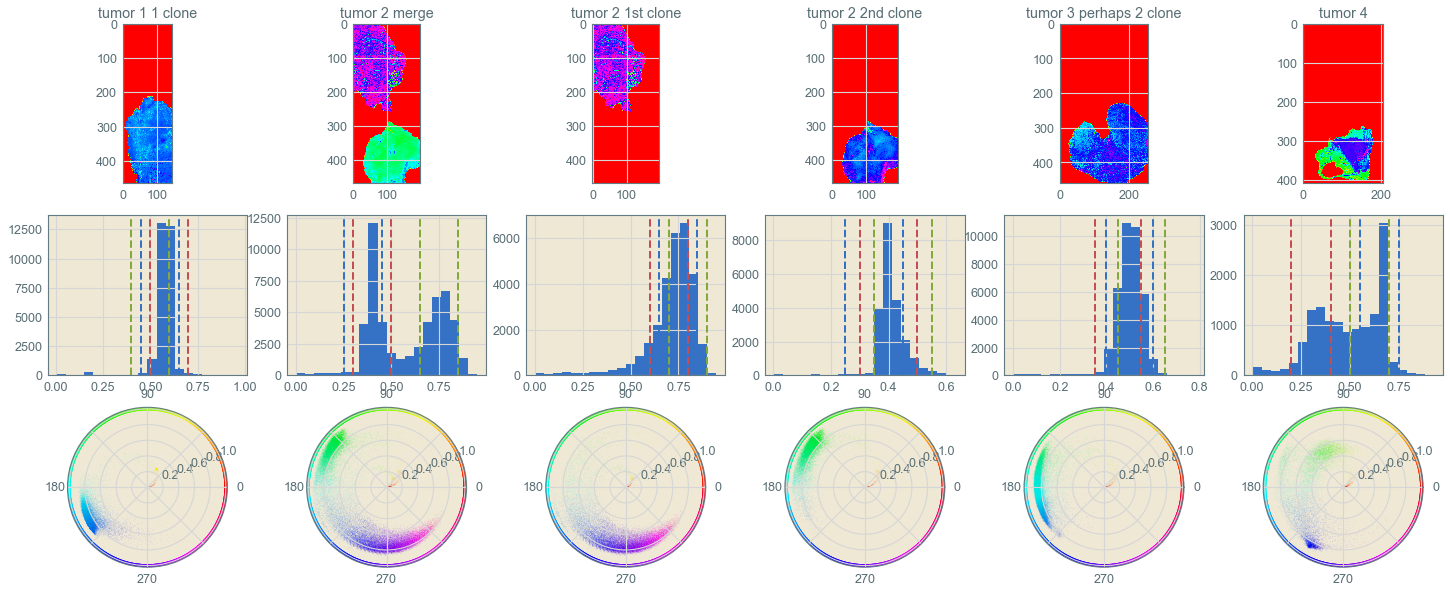

In [41]:
img_merge = img2[0] + img3[0]
pan_hue_saturation([img1[0], img_merge, img2[0], img3[0], img4[0], img5[0]],
                   names=['tumor 1 1 clone', 'tumor 2 merge', 'tumor 2 1st clone',
                          'tumor 2 2nd clone', 'tumor 3 perhaps 2 clone', 'tumor 4'])

# Ternary Plot

In [4]:
### https://plot.ly/~empet/15011.embedf
from sklearn.mixture import GaussianMixture

/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_graph/lib/python3.6/site-packages/ipykernel-5.1.2-py3.6.egg/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_graph/lib/python3.6/site-packages/ipykernel-5.1.2-py3.6.egg/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_graph/lib/python3.6/site-packages/ipykernel-5.1.2-py3.6.egg/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(16776,)
(5023, 3)


No handles with labels found to put in legend.


(array([-1,  0,  1,  2,  3,  4,  5]), array([ 165, 4809,   29,    5,    4,    5,    6]))


/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_graph/lib/python3.6/site-packages/ipykernel-5.1.2-py3.6.egg/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_graph/lib/python3.6/site-packages/ipykernel-5.1.2-py3.6.egg/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_graph/lib/python3.6/site-packages/ipykernel-5.1.2-py3.6.egg/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(23128,)
(8692, 3)


No handles with labels found to put in legend.


(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17]), array([ 454, 4631,   10,   16,    7,    8,    4,   12,    8,    8,    6,
       3466,    7,   16,   18,    5,    5,    7,    4]))


/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_graph/lib/python3.6/site-packages/ipykernel-5.1.2-py3.6.egg/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_graph/lib/python3.6/site-packages/ipykernel-5.1.2-py3.6.egg/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_graph/lib/python3.6/site-packages/ipykernel-5.1.2-py3.6.egg/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(29568,)
(6639, 3)


No handles with labels found to put in legend.


(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), array([ 230, 6317,    6,    7,   14,    7,   28,    4,    4,    5,    5,
          7,    5]))


/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_graph/lib/python3.6/site-packages/ipykernel-5.1.2-py3.6.egg/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_graph/lib/python3.6/site-packages/ipykernel-5.1.2-py3.6.egg/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_graph/lib/python3.6/site-packages/ipykernel-5.1.2-py3.6.egg/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(21115,)
(2230, 3)


No handles with labels found to put in legend.


(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38]), array([487,  39,  73,  17,  18,  12,  20, 723,  12,  68,   5,  11,   9,
         7,   5,   5,   4,  10,  59,  23, 385,  51,  18,   5,  10,  10,
        27,   7,  11,   9,   9,  13,  25,   5,  12,   5,   5,   7,   4,
         5]))


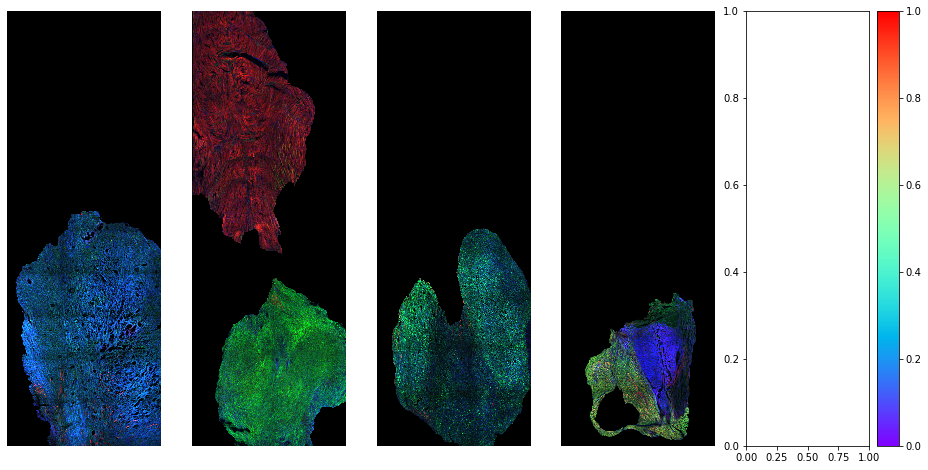

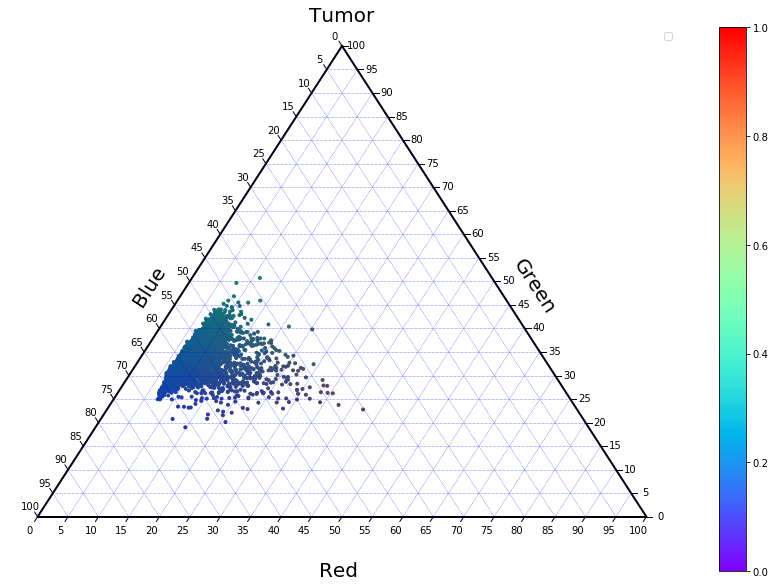

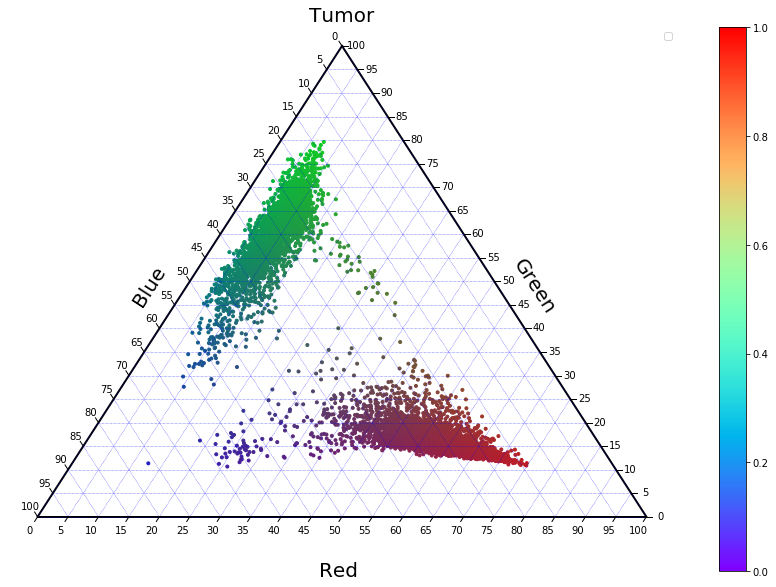

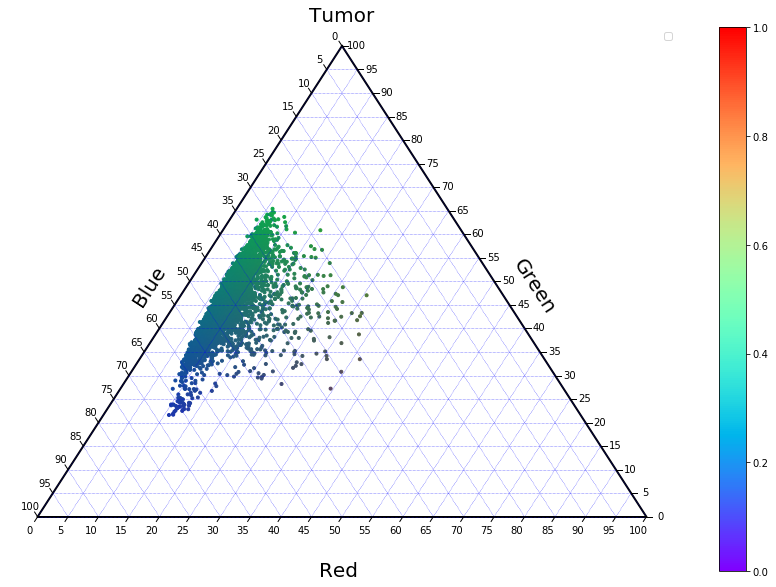

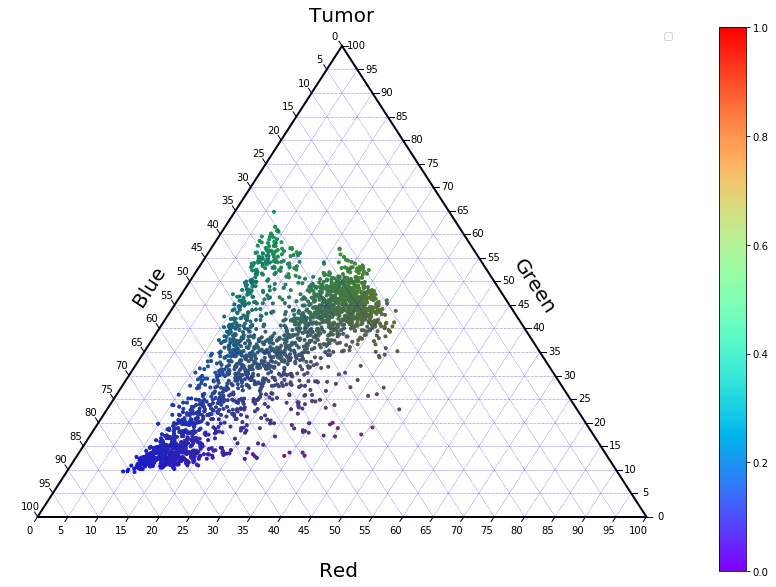

In [5]:
fig, axes= plt.subplots(1, 5)
fig.set_size_inches(16,8)
# cbar_ax = fig.add_axes([1, 0.15, 0.05, 0.7])
radius = 20
Ds = []
for a, img in zip(list(axes.flat), [img1[1], img2[1]+img3[1], img4[1], img5[1]]):
    test = img
    RGB_sum = test.sum(axis=2) # + 1e-6
    test_R = (test[:, :, 0] - test[:, :, 0].min())/RGB_sum
    test_R[np.isnan(test_R)] = 0
    test_G = (test[:, :, 1] - test[:, :, 1].min())/RGB_sum
    test_G[np.isnan(test_G)] = 0
    test_B = (test[:, :, 2] - test[:, :, 2].min())/RGB_sum
    test_B[np.isnan(test_B)] = 0    
    im = a.imshow(test, cmap=plt.cm.rainbow, aspect='auto')
    a.axis('off')
    
    test_R = downscale_local_mean(test_R, (radius, radius))
    test_G = downscale_local_mean(test_G, (radius, radius))
    test_B = downscale_local_mean(test_B, (radius, radius))
    
    A = test_R.reshape(-1)
    B = test_G.reshape(-1)
    C = test_B.reshape(-1)

#     selection = (A!=0) & (B!=0) & (C!=0)
#     A = A[selection]
#     B = B[selection]
#     C = C[selection]    

    D = np.dstack([A, B, C])
    D = D.reshape((D.shape[1], D.shape[2]))
    print(A.shape)
    D = D[D.sum(axis=1)==1,:]
    print(D.shape)
    
    DL = []
    for i in range(D.shape[0]):
        DL.append(D[i, :])
    
    # Scatter Plot
#     axes = plt.subplots(1, 3)
    scale = 100
    figure, tax = ternary.figure(scale=scale)
    figure.set_size_inches(15, 10)

    # Plot a few different styles with a legend
    tax.scatter(D*100, marker='.', # ax=axes[0],
                colorbar=True, c=DL,
                colormap=plt.cm.rainbow, vmin=0, vmax=1)
    tax.legend()
    tax.set_title("Tumor", fontsize=20)
    tax.boundary(linewidth=2.0)

    ## Axis
    tax.left_axis_label("Blue", fontsize=20)
    tax.right_axis_label("Green", fontsize=20)
    tax.bottom_axis_label("Red", fontsize=20)

    tax.gridlines(multiple=5, color="blue")
    tax.ticks(axis='lbr', linewidth=1, multiple=5)
    tax.clear_matplotlib_ticks()
    tax.get_axes().axis('off')
      
    Ds.append(D)
    clustering = DBSCAN(eps=0.01, min_samples=5).fit(D)
    print(np.unique(clustering.labels_, return_counts=True))

# plt.tight_layout()
fig.colorbar(im) #, cax=cbar_ax)

In [22]:
X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])

print(X)
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

[[ 1  2]
 [ 2  2]
 [ 2  3]
 [ 8  7]
 [ 8  8]
 [25 80]]


In [23]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1])

In [24]:
D[:5]

array([[0.28855852, 0.22517781, 0.48626367],
       [0.64990094, 0.14341741, 0.20668165],
       [0.42179109, 0.22611163, 0.35209728],
       [0.67691929, 0.10072253, 0.22235817],
       [0.1229446 , 0.24366564, 0.63338976]])

In [26]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [27]:
%%R
library(ggtern)
library(dbscan)
library(fpc)
library(patchwork)
library(densityClust)

R[write to console]: Loading required package: ggplot2

R[write to console]: Registered S3 methods overwritten by 'ggtern':
  method           from   
  +.gg             ggplot2
  grid.draw.ggplot ggplot2
  plot.ggplot      ggplot2
  print.ggplot     ggplot2

R[write to console]: --
Remember to cite, run citation(package = 'ggtern') for further info.
--

R[write to console]: 
Attaching package: ‘ggtern’


R[write to console]: The following objects are masked from ‘package:ggplot2’:

    %+%, aes, annotate, calc_element, ggplot, ggplot_build,
    ggplot_gtable, ggplotGrob, ggsave, layer_data, theme, theme_bw,
    theme_classic, theme_dark, theme_gray, theme_light, theme_linedraw,
    theme_minimal, theme_void


R[write to console]: 
Attaching package: ‘fpc’


R[write to console]: The following object is masked from ‘package:dbscan’:

    dbscan




In [112]:
D = Ds[0]

OPTICS ordering/clustering for 5023 objects.
Parameters: minPts = 200, eps = 1, eps_cl = 0.05, xi = NA
The clustering contains 1 cluster(s) and 138 noise points.

   0    1 
 138 4885 

Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi, cluster
List of 9
 $ order      : int [1:5023] 1 5000 4988 5007 5004 5001 4990 4989 4970 4969 ...
 $ reachdist  : num [1:5023] Inf 0.0213 0.0228 0.0634 0.0104 ...
 $ coredist   : num [1:5023] 0.0716 0.0326 0.0356 0.1087 0.0141 ...
 $ predecessor: int [1:5023] NA 3154 3012 861 2639 1753 1201 3763 3506 232 ...
 $ minPts     : num 200
 $ eps        : num 1
 $ eps_cl     : num 0.05
 $ xi         : logi NA
 $ cluster    : int [1:5023] 0 1 1 0 1 1 1 1 1 1 ...
 - attr(*, "class")= chr "optics"
NULL
  Var1 Freq Ratio
1    0  138  0.03
2    1 4885  0.97
          V1        V2        V3     col
1 0.14011395 0.4098428 0.4500432 #246973
2 0.11664592 0.3878473 0.4955068 #1E637E
3 0.12360425 0.3802374 0.4961584 #2061

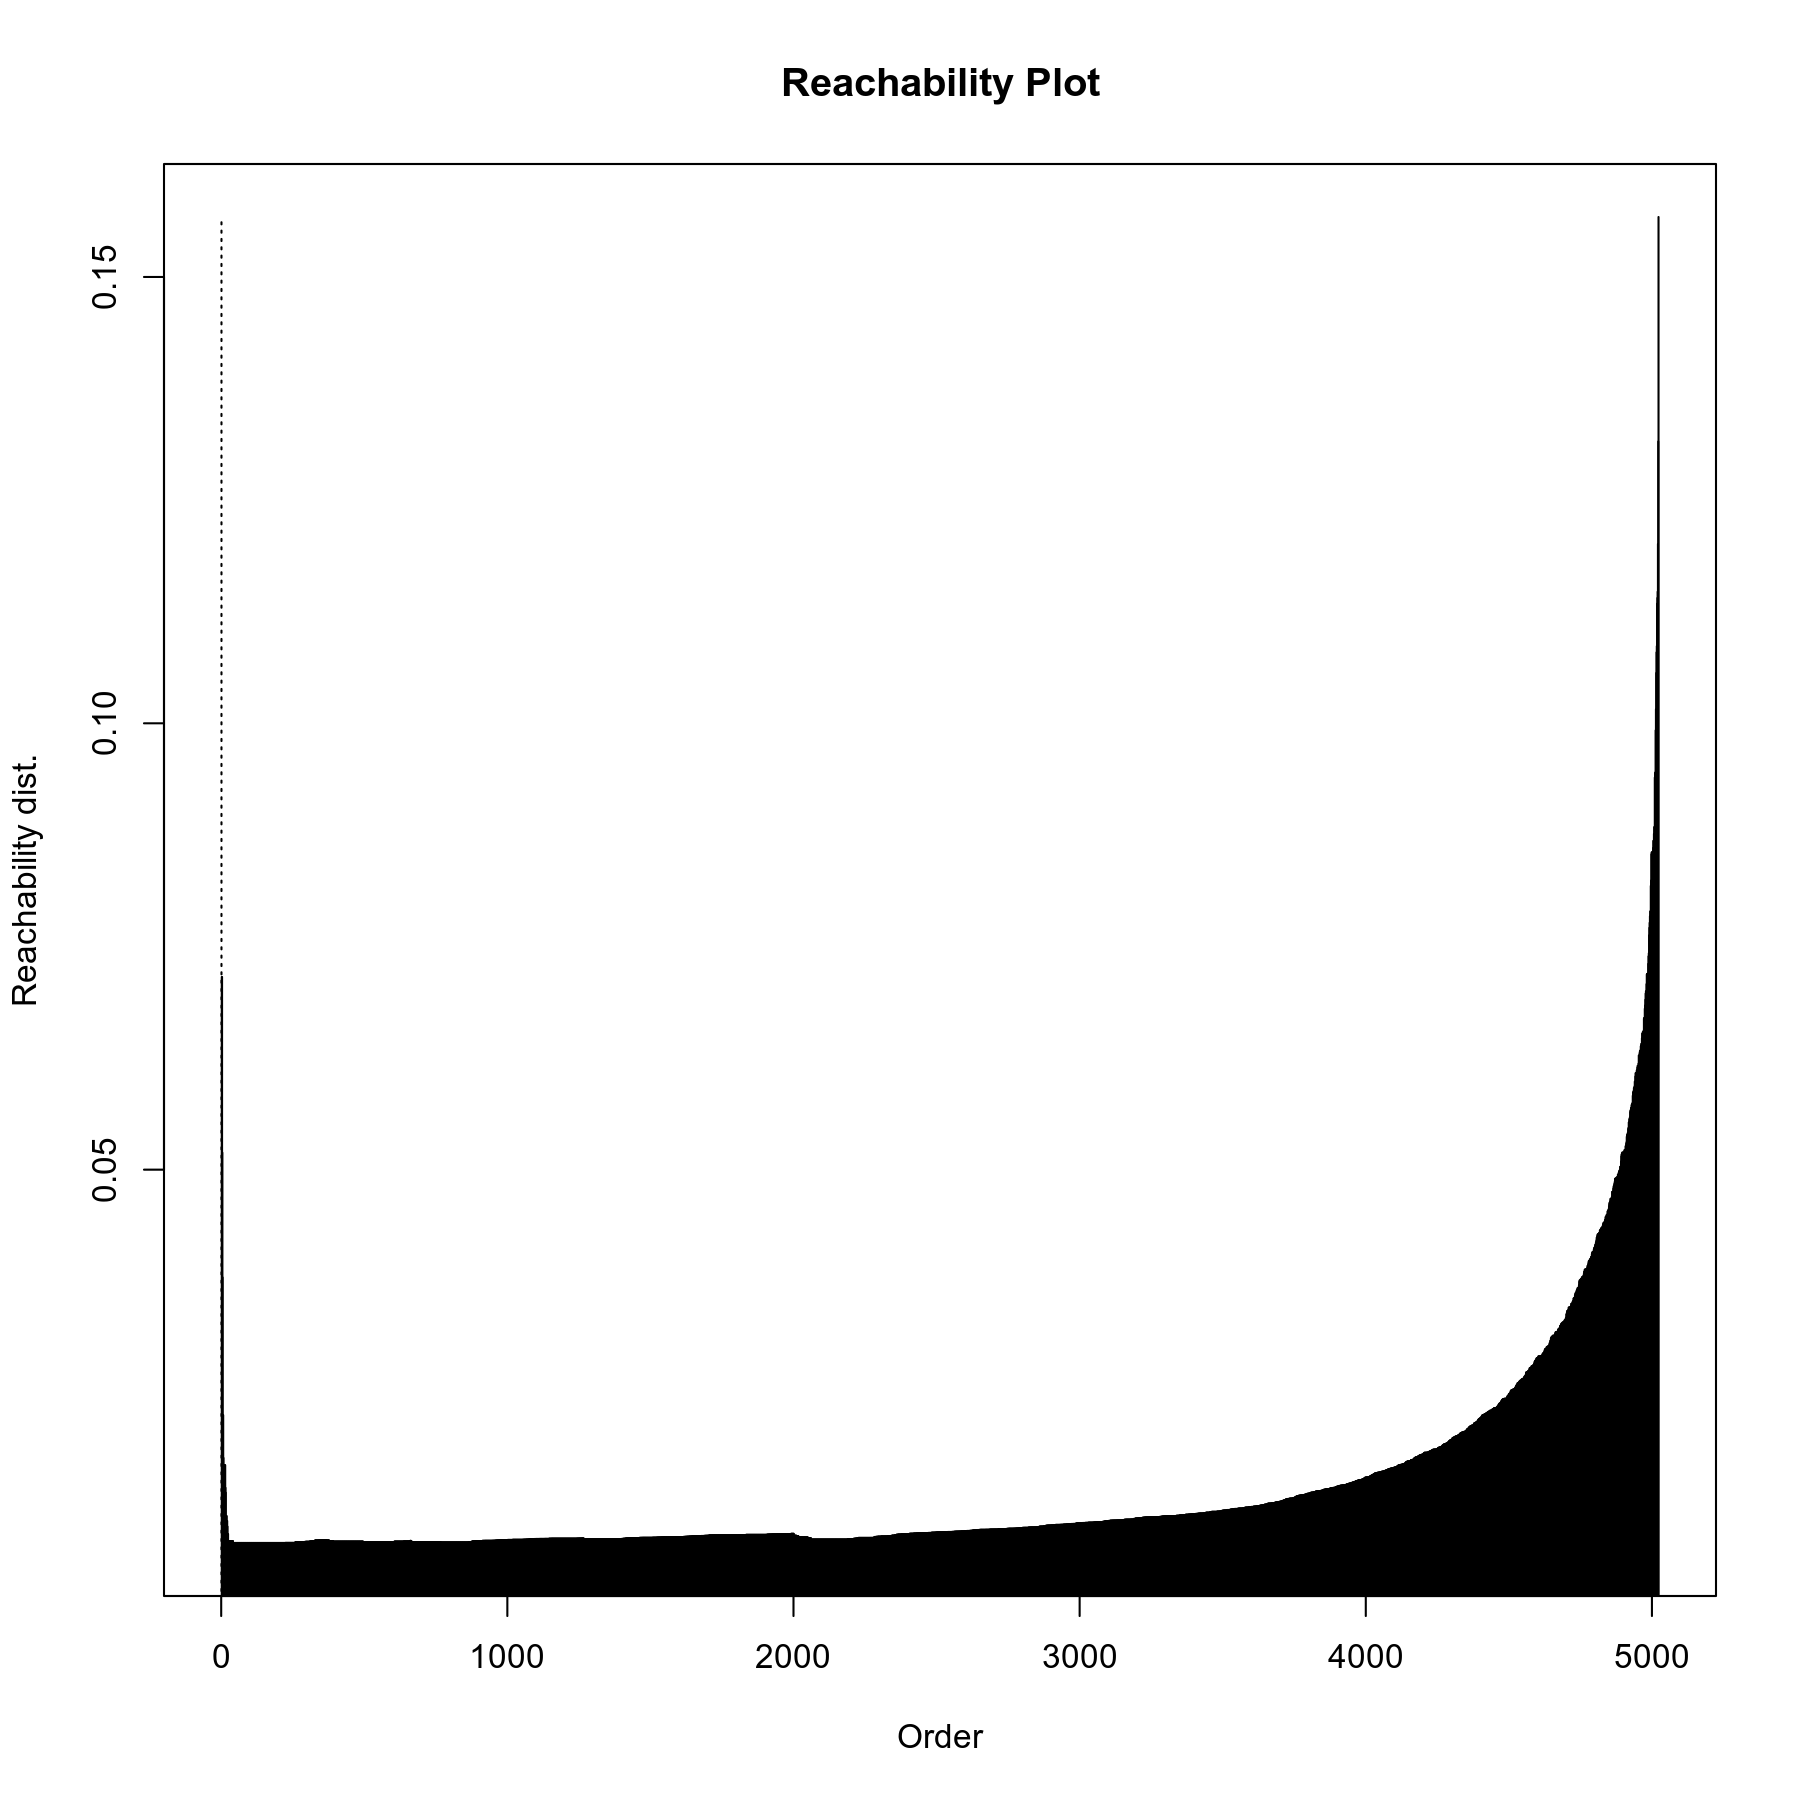

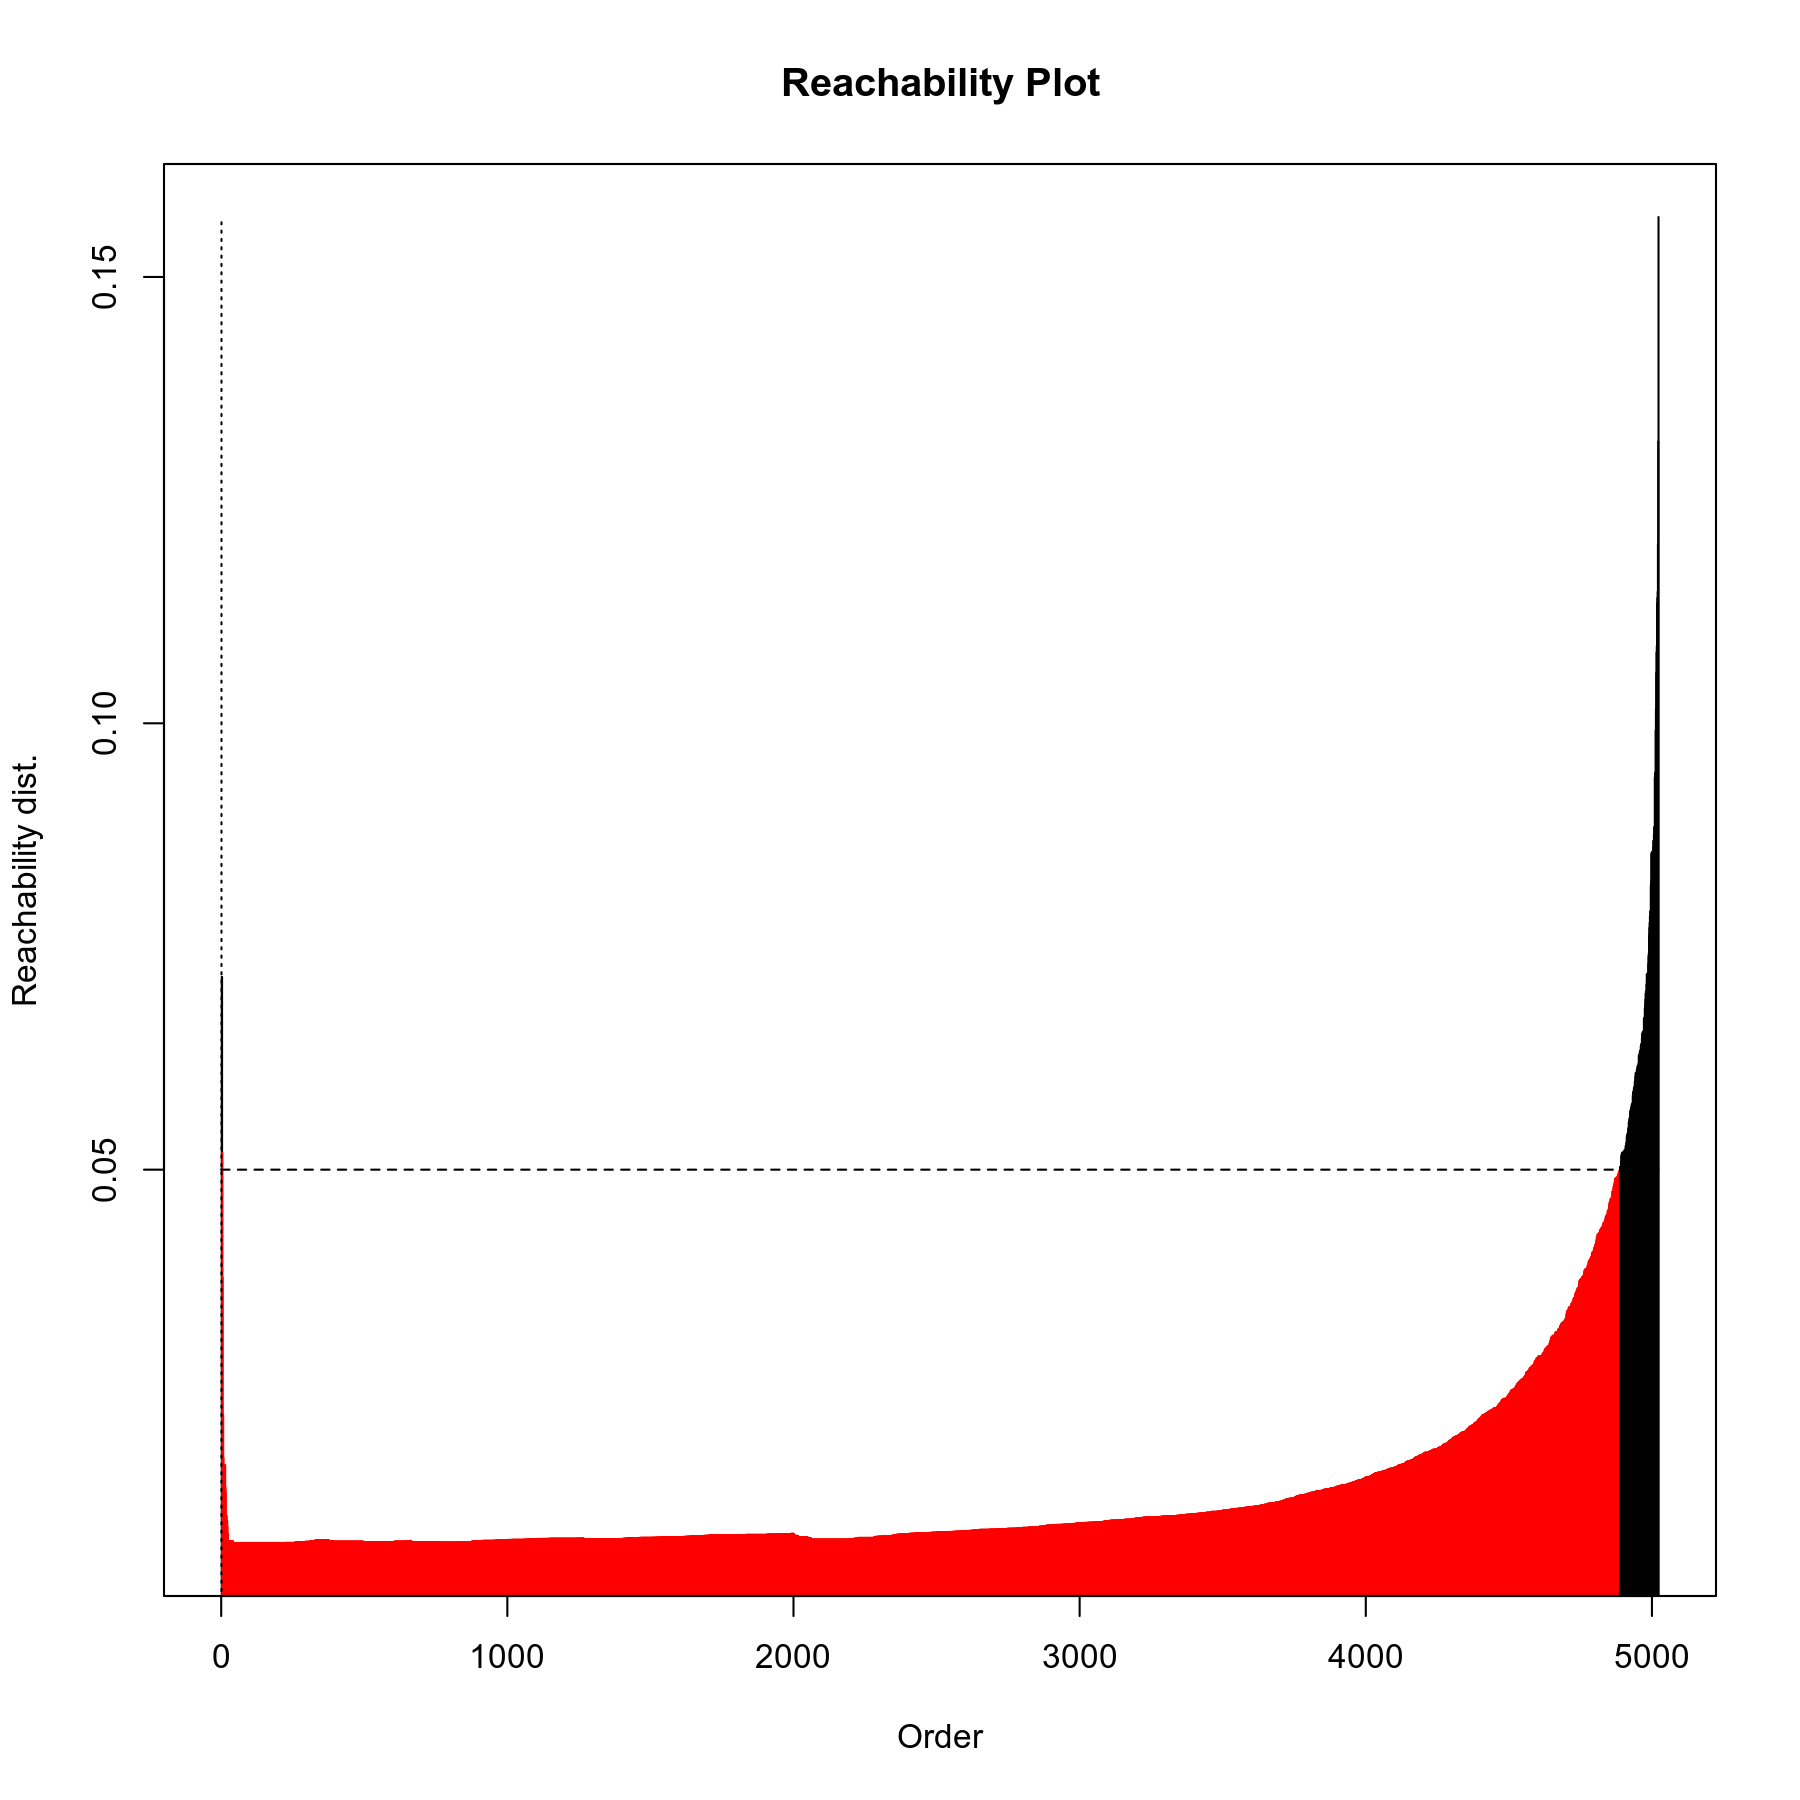

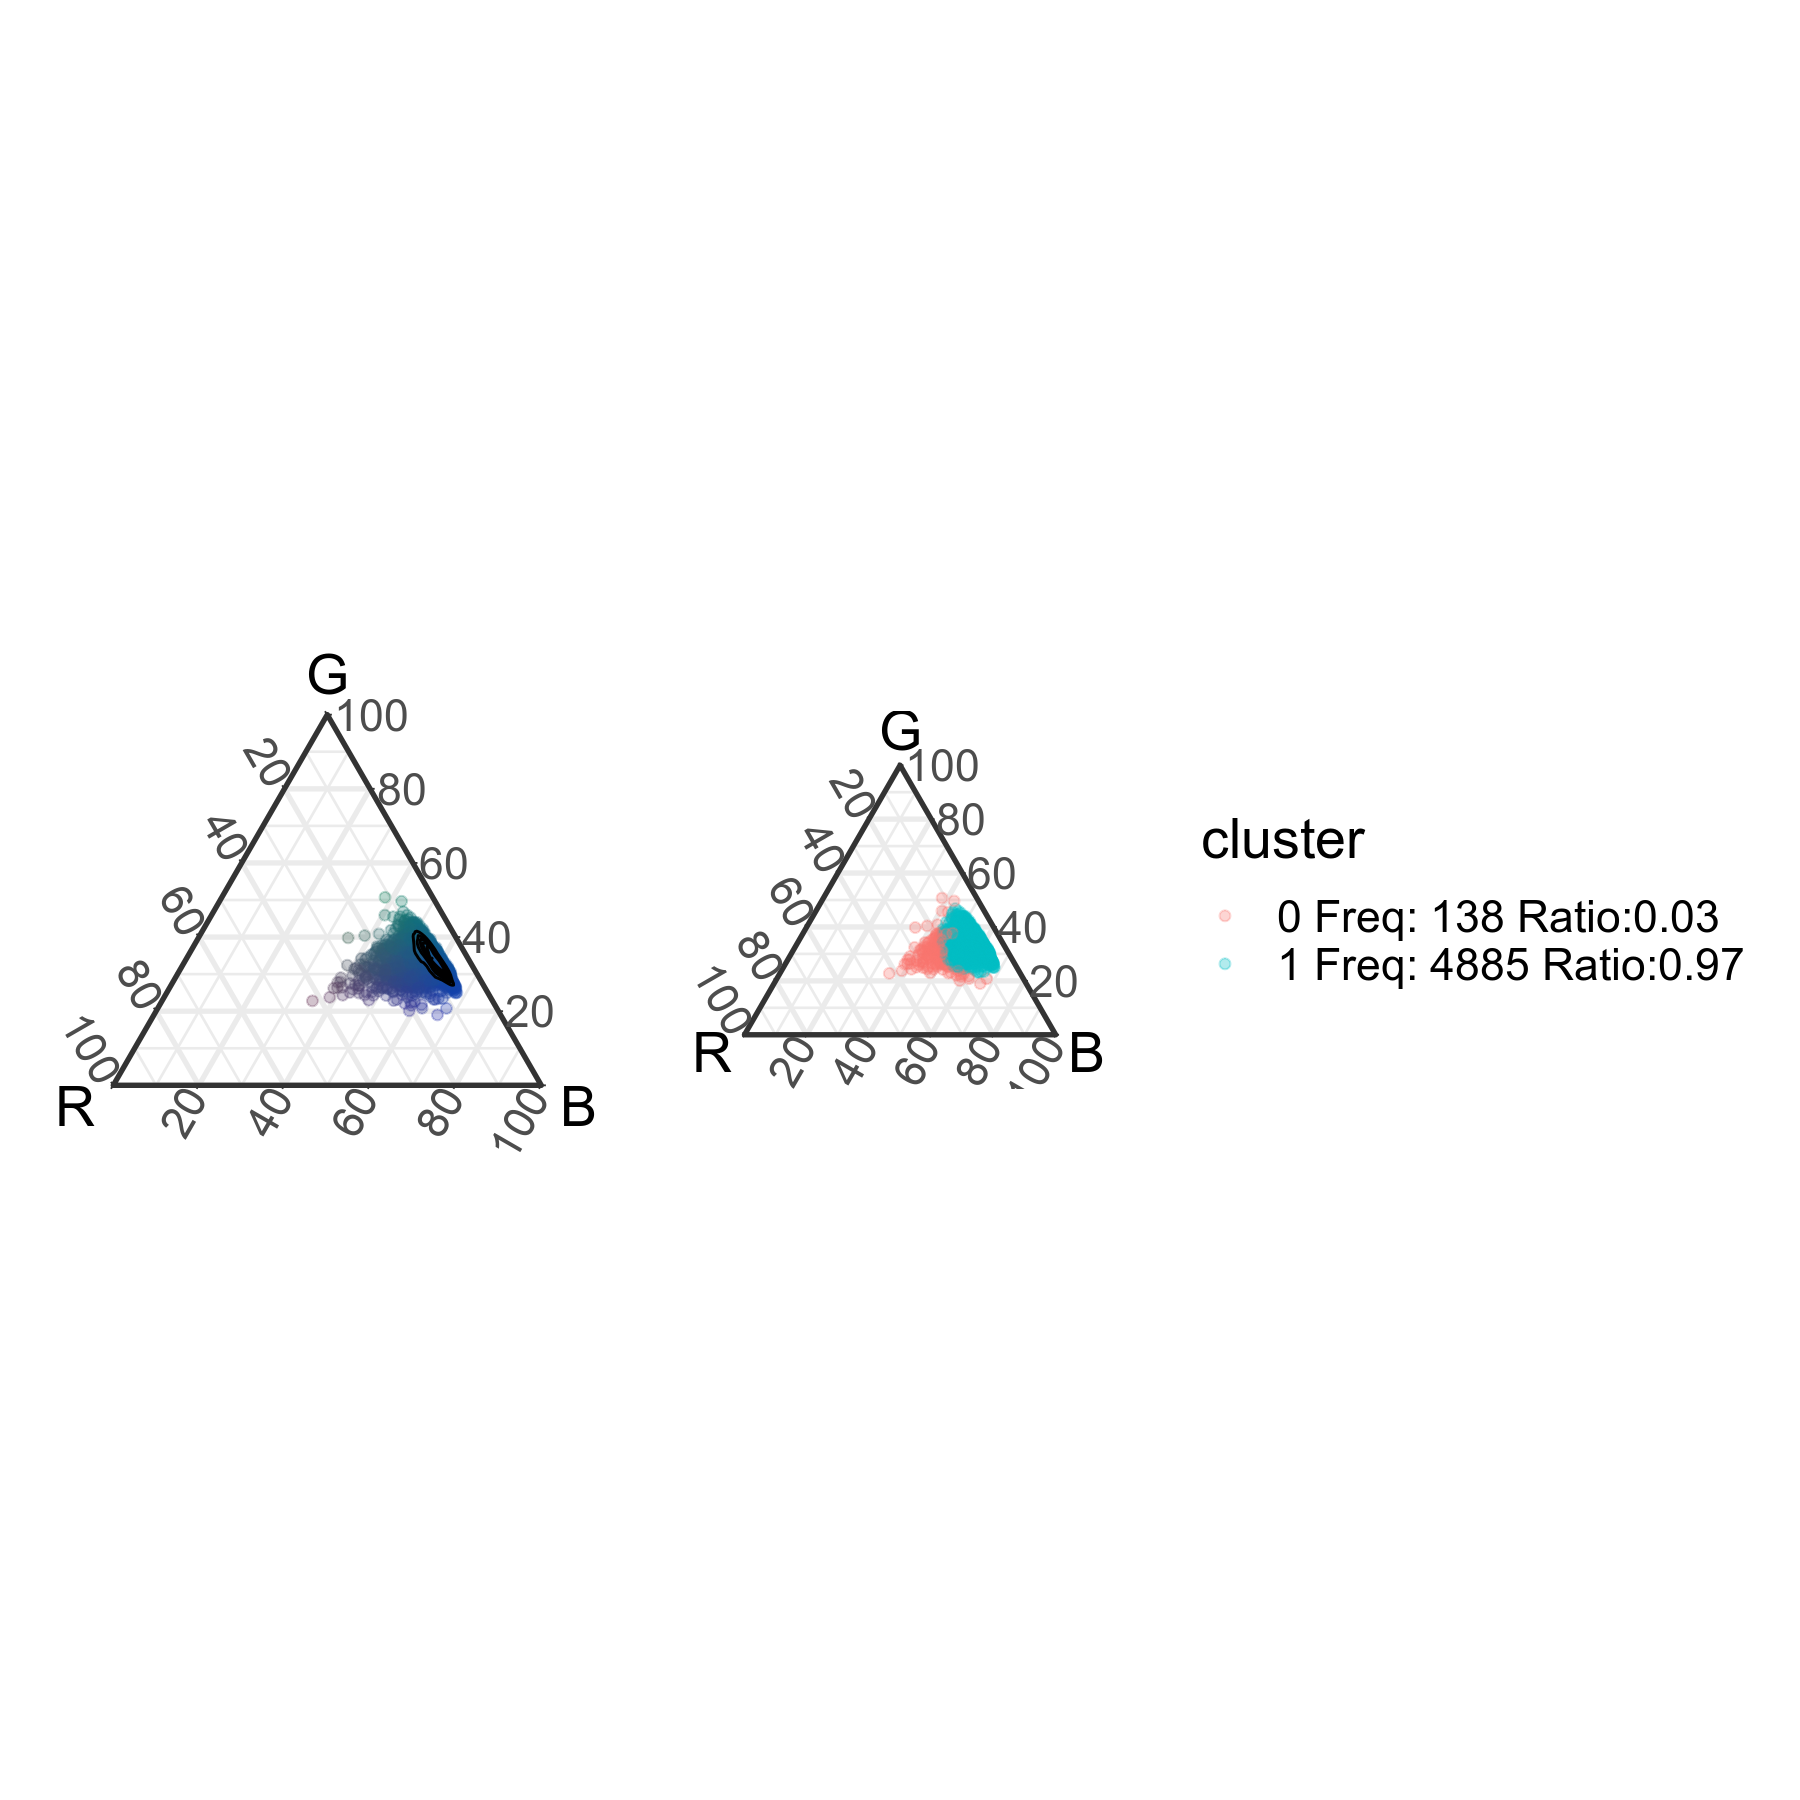

In [114]:
%%R -i D -w 9 -h 9 --units in -r 200 

library(patchwork)
D = as.data.frame(D)
set.seed(123)
# db <- dbscan(D, eps = .5, minPts = 10,  borderPoints = F)
# print(db)
# hdb <- hdbscan(D, minPts = 100)
# print(hdb)

res = dbscan::optics(D, eps=1, minPts=200)
plot(res)

res <- dbscan::extractDBSCAN(res, eps_cl = 0.05)
print(res)
print(str(res))
plot(res)

# Clust <- densityClust(D, gaussian=TRUE)
# p4 = qplot(Clust$rho, Clust$delta, xlab='rho', ylab='delta', main='Density cluster attributes')
# Clust <- findClusters(Clust, rho=0.9, delta=0.2)

counts = as.data.frame(table(res$cluster))
counts$Ratio = round(counts$Freq/sum(counts$Freq), 2)
print(counts)

D$col = apply(D, 1, function(x) {rgb(x[1], x[2], x[3])})
print(head(D))
print(dim(D))
# D$cluster = factor(Clust$clusters)
D$cluster = factor(res$cluster)
levels(D$cluster) = paste0(levels(D$cluster), " Freq: ", counts[,2], " Ratio:", counts[,3])
colnames(D) = c("R", "G", "B", "col", 'cluster')
col = D$col
names(col) = D$ID
colnames(D) = c("R", "G", "B", "col", 'cluster')
print(head(D))
p1 = ggtern(D,aes(R,G,B)) +
 geom_point(color = col, alpha=.3) + 
 geom_density_tern(bins=6, color='black', lwd=.5) + theme_bw(base_size = 20, base_family = "")

p2 = ggtern(D,aes(R,G,B, color=cluster)) + theme_bw(base_size = 20, base_family = "") + 
   geom_point(alpha=.3)

out = ggtern::grid.arrange(p1, p2, ncol=2, widths=c(1, 1.75))
ggsave('Tumor1_cluster.pdf', out, width=18, height=6)

# D = as.data.frame(D)
# D$col = apply(D, 1, function(x) {rgb(x[1], x[2], x[3])})
# print(head(D))
# print(dim(D))
# colnames(D) = c("R", "G", "B", "col")
# ggtern(data=D,aes(x=R,y=G,z=B),aes(x,y,z)) + 
#   stat_density_tern(geom="polygon",color='black',
#                     n=400,h=0.75,expand = 1.1, bins=100,
#                     base='identity',
#                     aes(fill = ..level..), #weight = d
#                     na.rm = TRUE) +  # geom_point(color="black",size=5,shape=21) + #geom_text(aes(label=id),size=3) + 
#   scale_fill_gradient(low="yellow",high="red") + 
#   scale_color_gradient(low="yellow",high="red") + 
#   theme_rgbw() + 
#   theme(legend.justification=c(0,1), legend.position=c(0,1)) +
#   theme_gridsontop() + 
#   guides(fill = guide_colorbar(order=1),color="none") + 
#   labs(title= "Ternary Plot and Filled Contour",fill = "Value, V")

In [115]:
D = Ds[1]
print(len(D))

8692


In [116]:
!pwd

/data/langenau/alvin_singlecell/02_microscopy/Tiffany


OPTICS ordering/clustering for 8692 objects.
Parameters: minPts = 200, eps = 1, eps_cl = 0.1, xi = NA
The clustering contains 2 cluster(s) and 99 noise points.

   0    1    2 
  99 4904 3689 

Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi, cluster
List of 9
 $ order      : int [1:8692] 1 4971 4966 4949 4934 4930 4918 4917 4893 4925 ...
 $ reachdist  : num [1:8692] Inf 0.0522 0.0782 0.0209 0.0139 ...
 $ coredist   : num [1:8692] 0.0199 0.0854 0.1395 0.028 0.0161 ...
 $ predecessor: int [1:8692] NA 4487 371 3205 3000 3314 1481 4653 3277 1237 ...
 $ minPts     : num 200
 $ eps        : num 1
 $ eps_cl     : num 0.1
 $ xi         : logi NA
 $ cluster    : int [1:8692] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "class")= chr "optics"
NULL
  Var1 Freq Ratio
1    0   99  0.01
2    1 4904  0.56
3    2 3689  0.42
         V1        V2        V3     col
1 0.5107891 0.1752043 0.3140065 #822D50
2 0.4228769 0.1536500 0.4234731 #6C276C
3 0.4003810 0.12

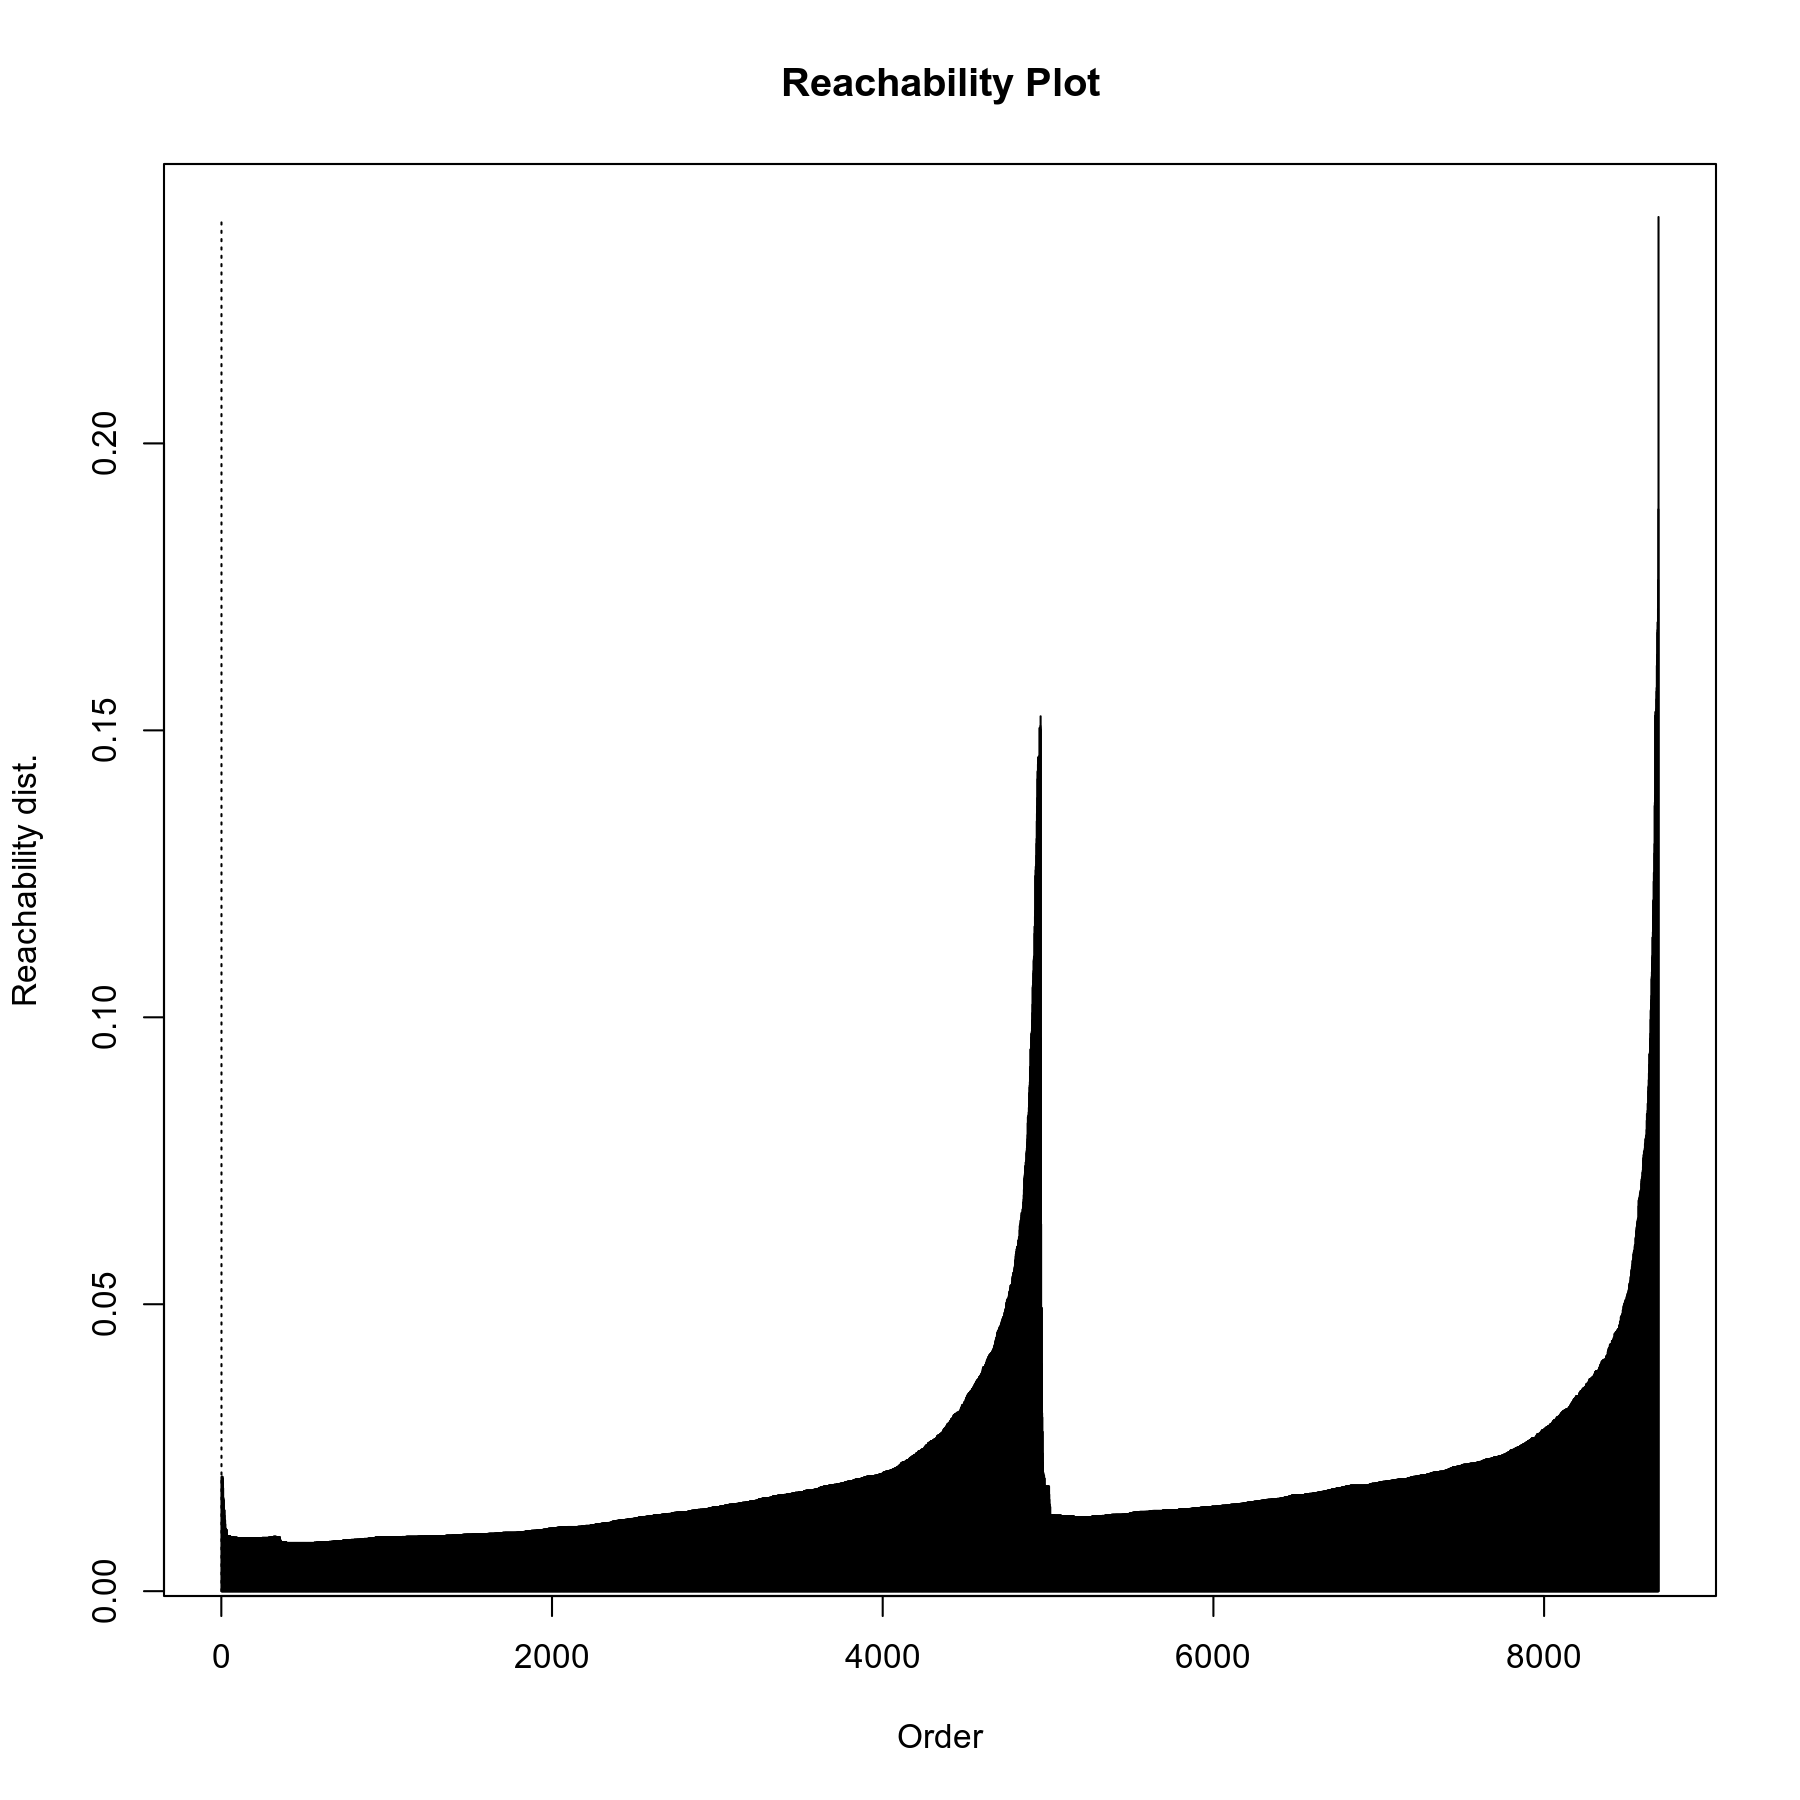

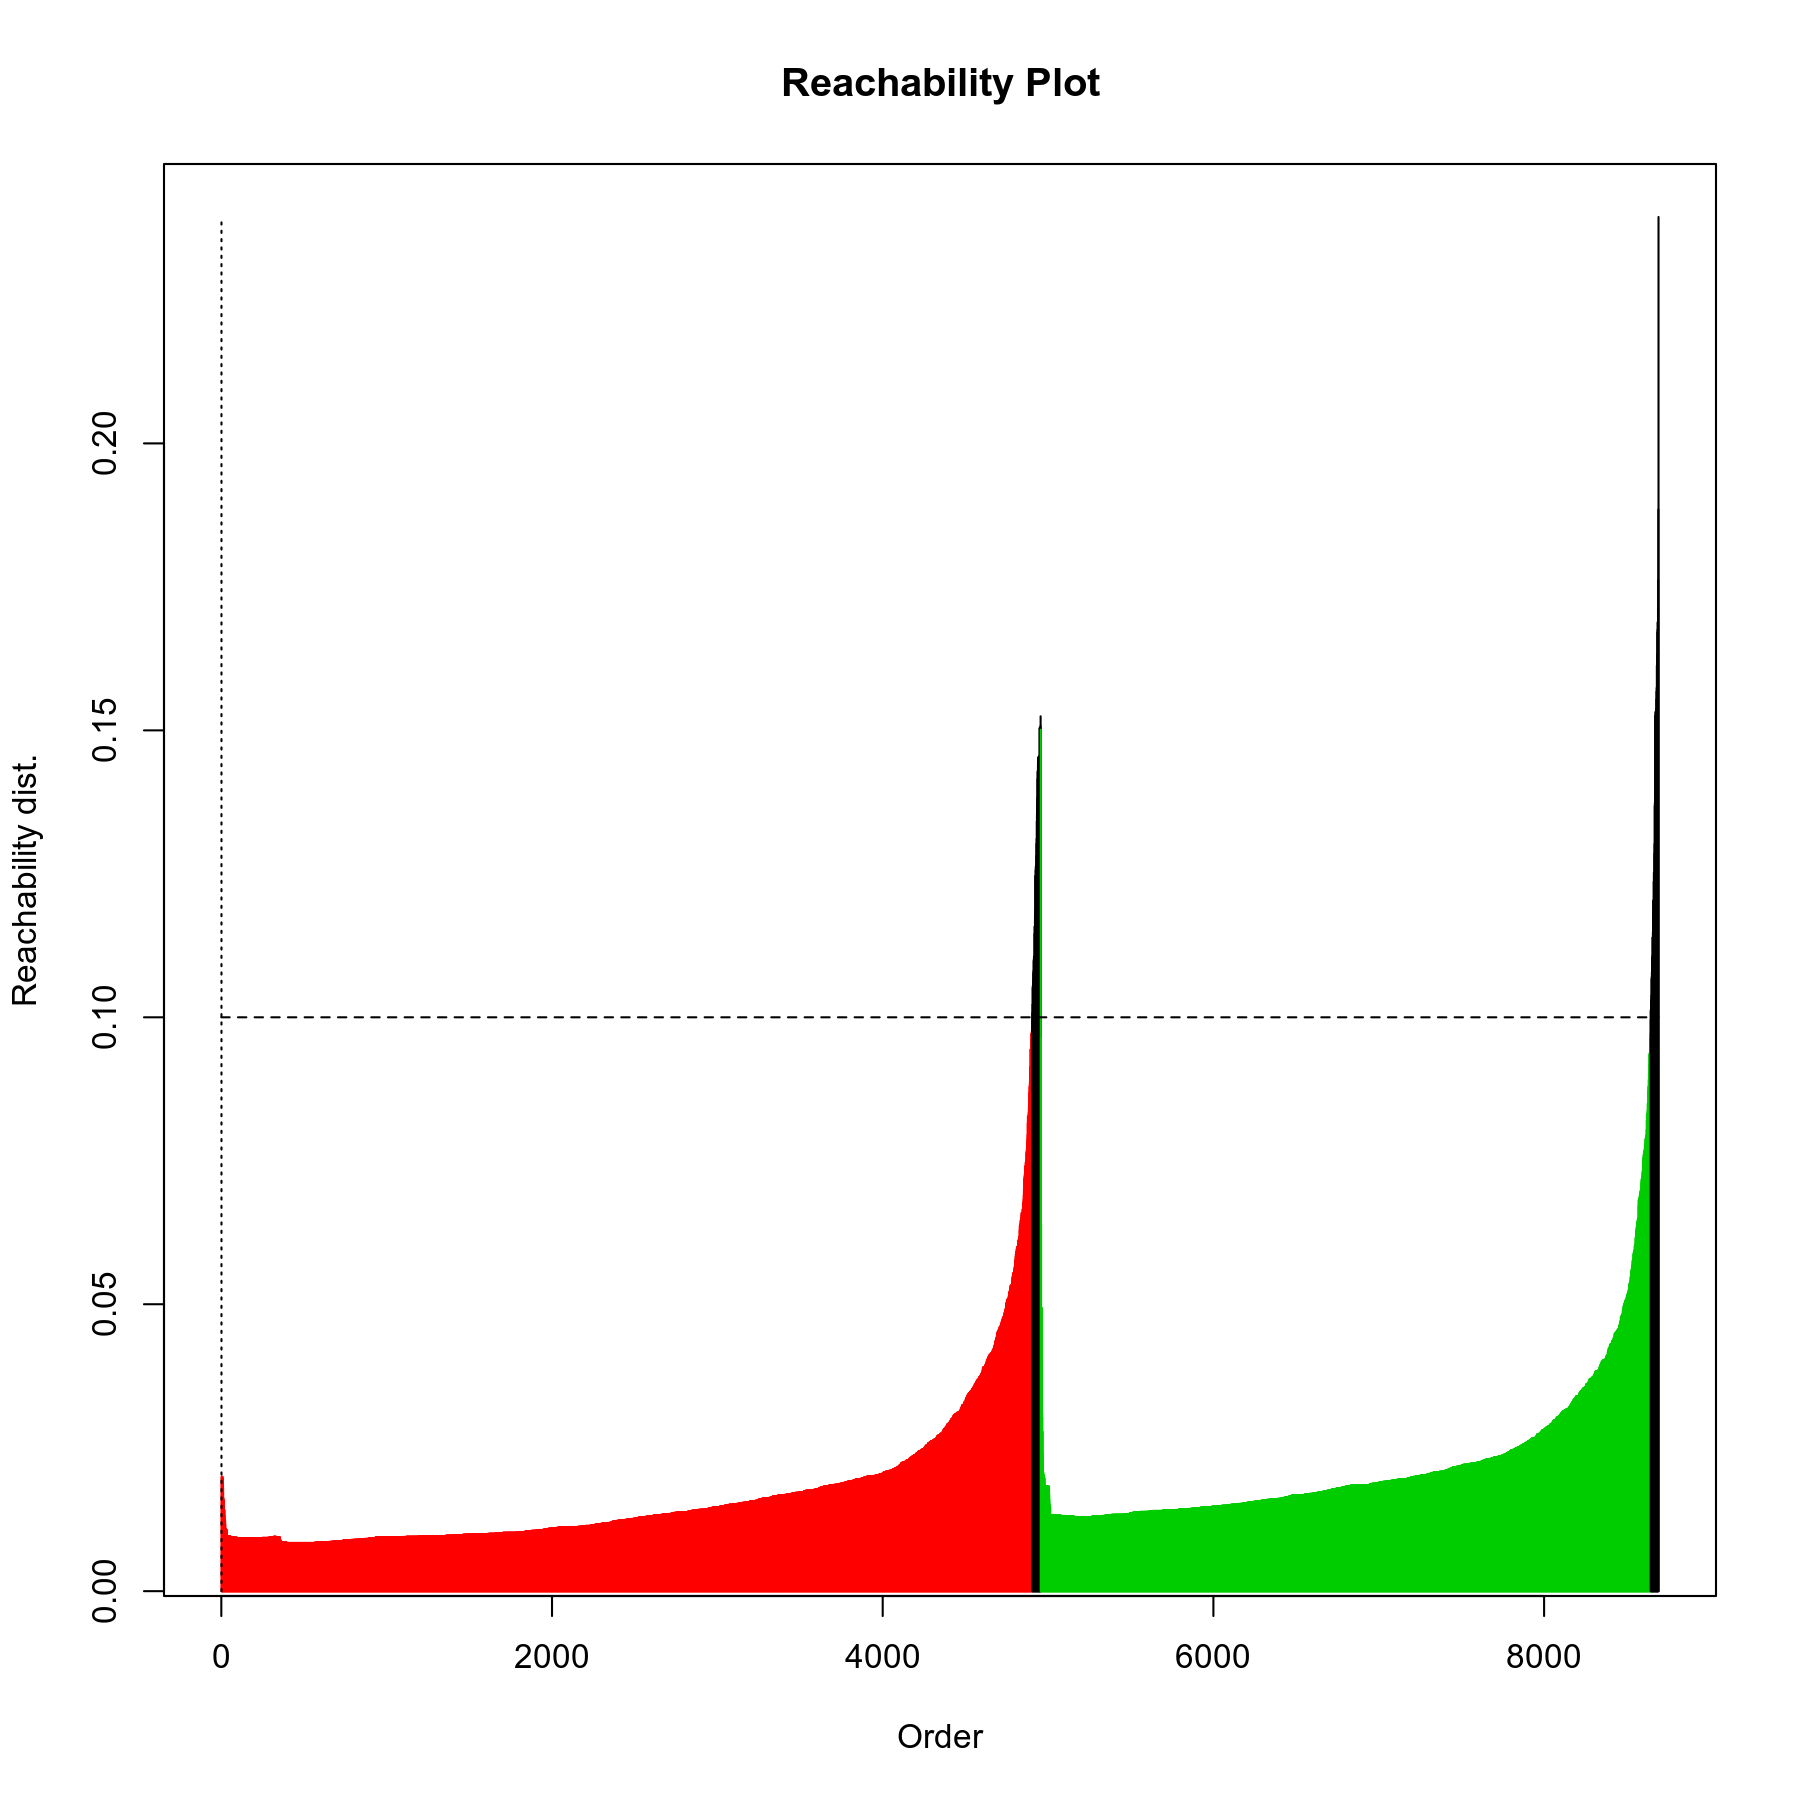

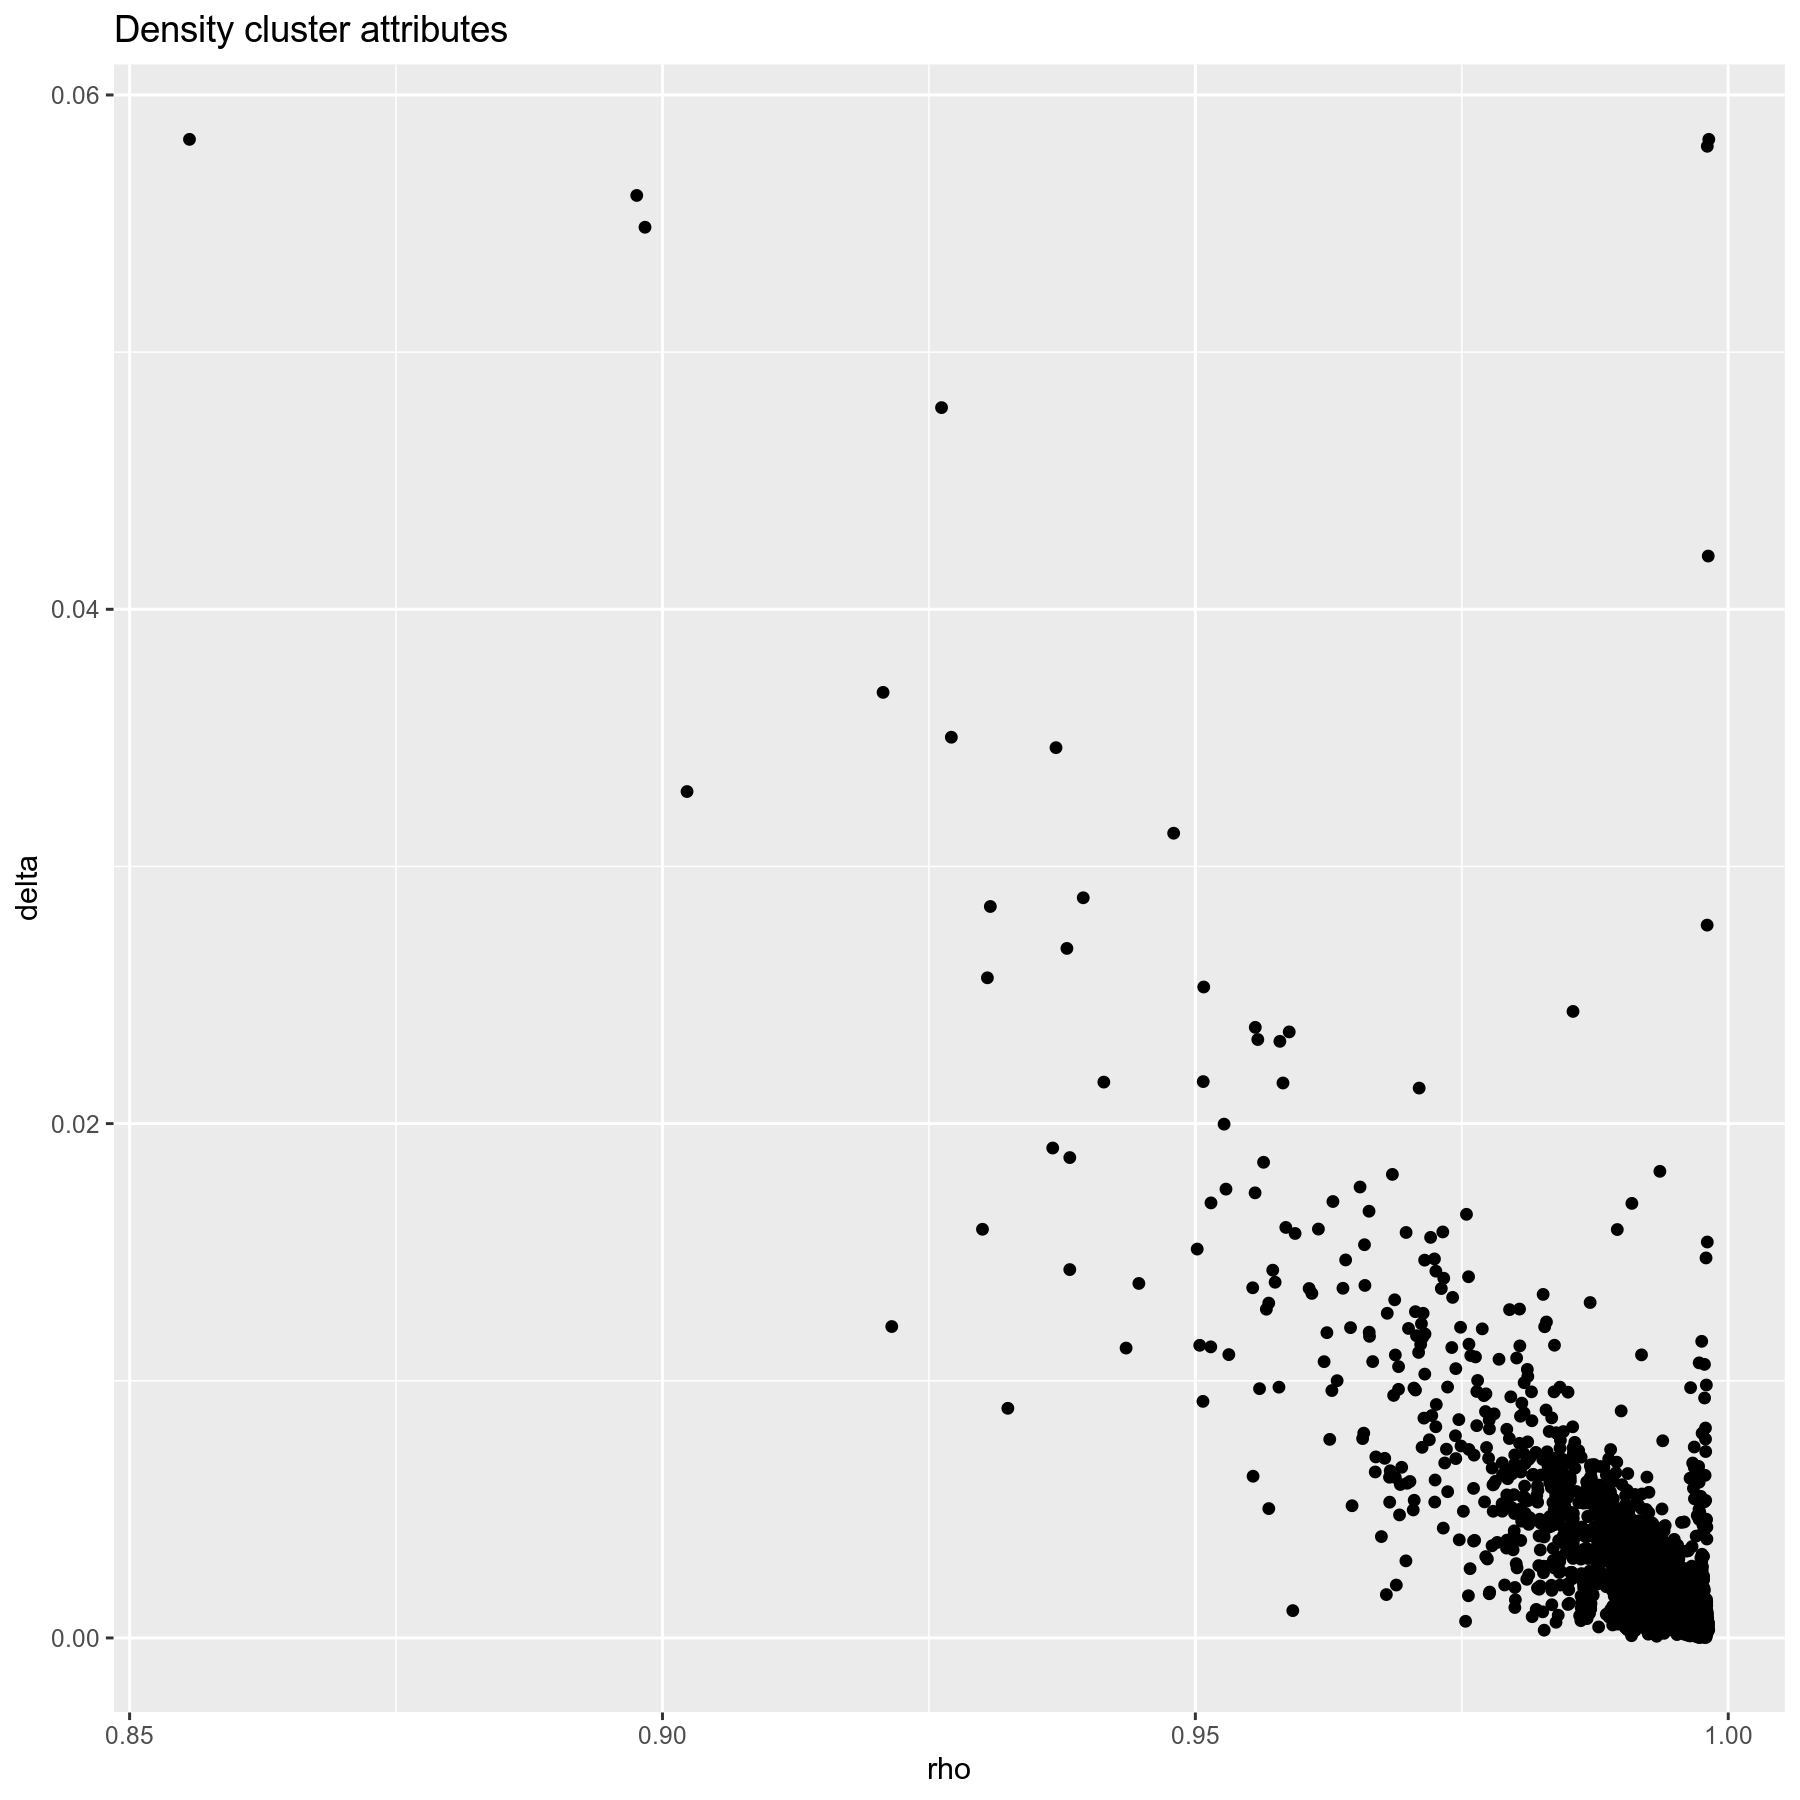

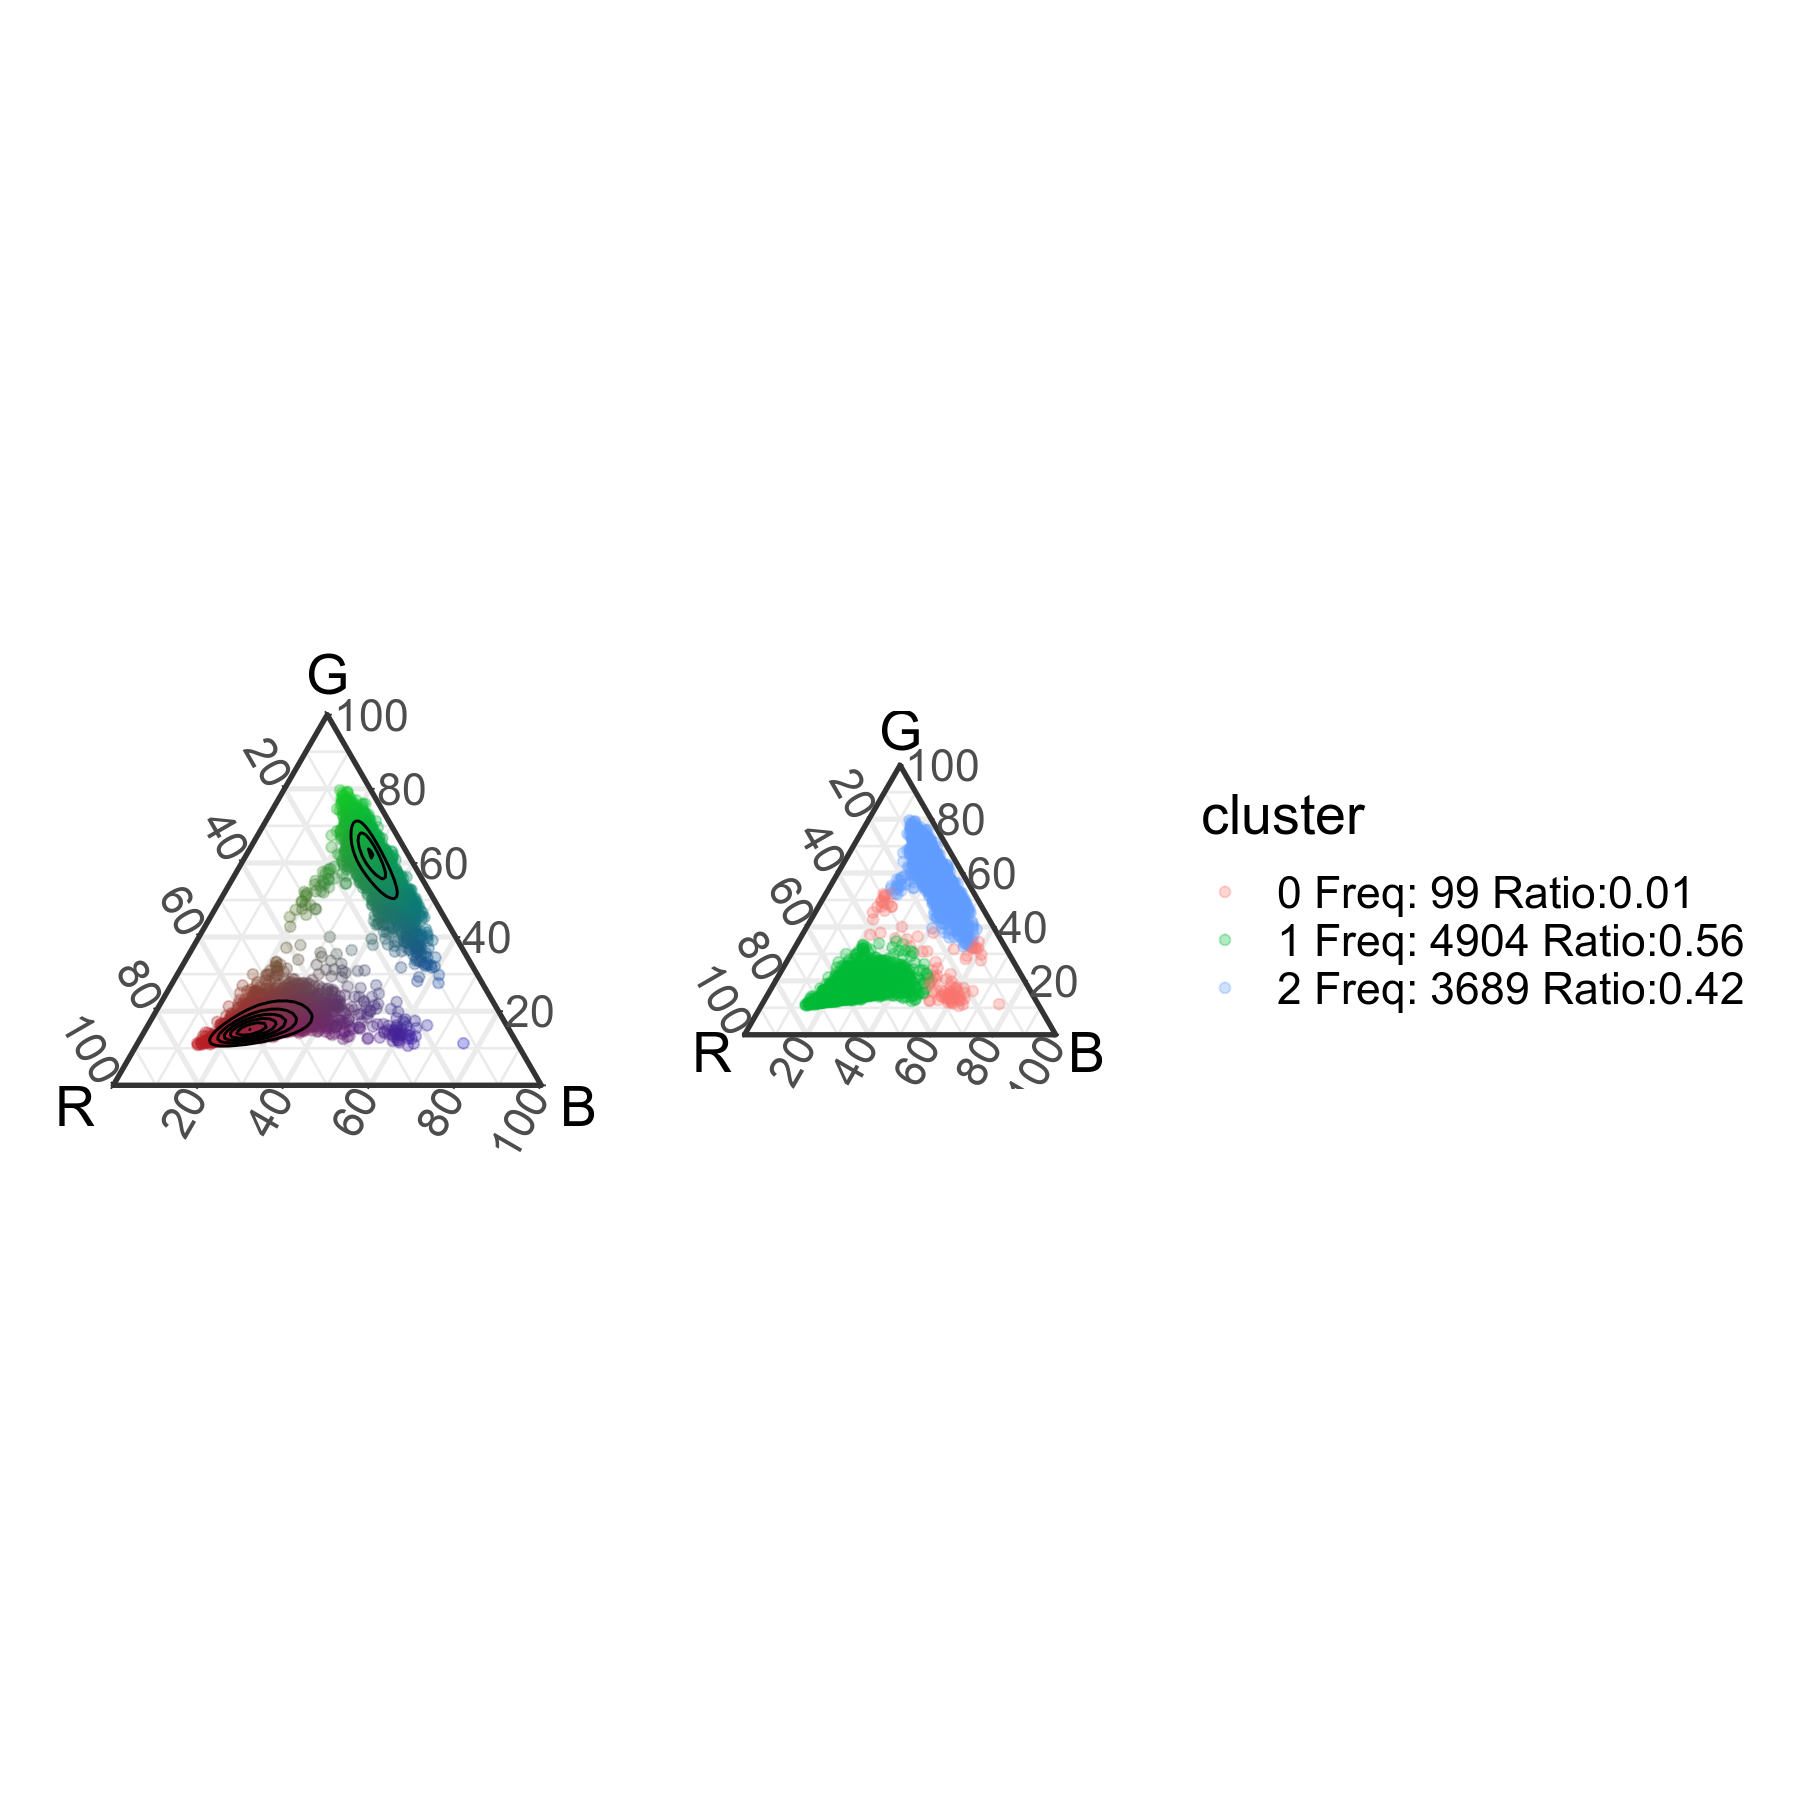

In [111]:
%%R -i D -w 9 -h 9 --units in -r 200 

library(patchwork)
D = as.data.frame(D)
# db <- dbscan(D, eps = .5, minPts = 10,  borderPoints = F)
# print(db)
# hdb <- hdbscan(D, minPts = 100)
# print(hdb)

# db <- fpc::dbscan(D, eps = 0.025, MinPts = 3)
# print(db)
# dbscan::kNNdistplot(D, k = 3)
# abline(h = 0.025, lty = 2)

res = dbscan::optics(D, eps=1, minPts=200)
plot(res)

res <- dbscan::extractDBSCAN(res, eps_cl = 0.1)
print(res)
print(str(res))
plot(res)

# Clust <- densityClust(D, gaussian=TRUE)
# p4 = qplot(Clust$rho, Clust$delta, xlab='rho', ylab='delta', main='Density cluster attributes')
# Clust <- findClusters(Clust, rho=0.9, delta=0.2)

counts = as.data.frame(table(res$cluster))
counts$Ratio = round(counts$Freq/sum(counts$Freq), 2)
print(counts)

D$col = apply(D, 1, function(x) {rgb(x[1], x[2], x[3])})
print(head(D))
print(dim(D))
# D$cluster = factor(Clust$clusters)
D$cluster = factor(res$cluster)
levels(D$cluster) = paste0(levels(D$cluster), " Freq: ", counts[,2], " Ratio:", counts[,3])
colnames(D) = c("R", "G", "B", "col", 'cluster')
col = D$col
names(col) = D$ID
colnames(D) = c("R", "G", "B", "col", 'cluster')
print(head(D))
p1 = ggtern(D,aes(R,G,B)) +
 geom_point(color = col, alpha=.3) + 
 geom_density_tern(bins=6, color='black', lwd=.5) + theme_bw(base_size = 20, base_family = "")

p2 = ggtern(D,aes(R,G,B, color=cluster)) + theme_bw(base_size = 20, base_family = "") + 
   geom_point(alpha=.3)

print(p4) ##  gridExtra::tableGrob(counts),
out = ggtern::grid.arrange(p1, p2, ncol=2, widths=c(1, 1.75))
ggsave('Tumor2_cluster.pdf', out, width=18, height=6)


# D = as.data.frame(D)
# D$col = apply(D, 1, function(x) {rgb(x[1], x[2], x[3])})
# print(head(D))
# print(dim(D))
# colnames(D) = c("R", "G", "B", "col")
# ggtern(data=D,aes(x=R,y=G,z=B),aes(x,y,z)) + 
#   stat_density_tern(geom="polygon",color='black',
#                     n=400,h=0.75,expand = 1.1, bins=100,
#                     base='identity',
#                     aes(fill = ..level..), #weight = d
#                     na.rm = TRUE) +  # geom_point(color="black",size=5,shape=21) + #geom_text(aes(label=id),size=3) + 
#   scale_fill_gradient(low="yellow",high="red") + 
#   scale_color_gradient(low="yellow",high="red") + 
#   theme_rgbw() + 
#   theme(legend.justification=c(0,1), legend.position=c(0,1)) +
#   theme_gridsontop() + 
#   guides(fill = guide_colorbar(order=1),color="none") + 
#   labs(title= "Ternary Plot and Filled Contour",fill = "Value, V")

In [107]:
D = Ds[2]
print(len(D))

6639


OPTICS ordering/clustering for 6639 objects.
Parameters: minPts = 200, eps = 1, eps_cl = 0.02, xi = NA
The clustering contains 1 cluster(s) and 981 noise points.

   0    1 
 981 5658 

Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi, cluster
List of 9
 $ order      : int [1:6639] 1 6630 6627 6626 6591 6576 6541 6574 6499 6450 ...
 $ reachdist  : num [1:6639] Inf 0.00795 0.00882 0.00817 0.00872 ...
 $ coredist   : num [1:6639] 0.00906 0.00832 0.01119 0.01019 0.00941 ...
 $ predecessor: int [1:6639] NA 5036 5573 1487 643 976 643 970 3291 1180 ...
 $ minPts     : num 200
 $ eps        : num 1
 $ eps_cl     : num 0.02
 $ xi         : logi NA
 $ cluster    : int [1:6639] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "class")= chr "optics"
NULL
  Var1 Freq Ratio
1    0  981  0.15
2    1 5658  0.85
          V1        V2        V3     col
1 0.07831738 0.4549656 0.4667170 #147477
2 0.07316339 0.4460613 0.4807753 #13727B
3 0.08299151 0.4820010 0.435007

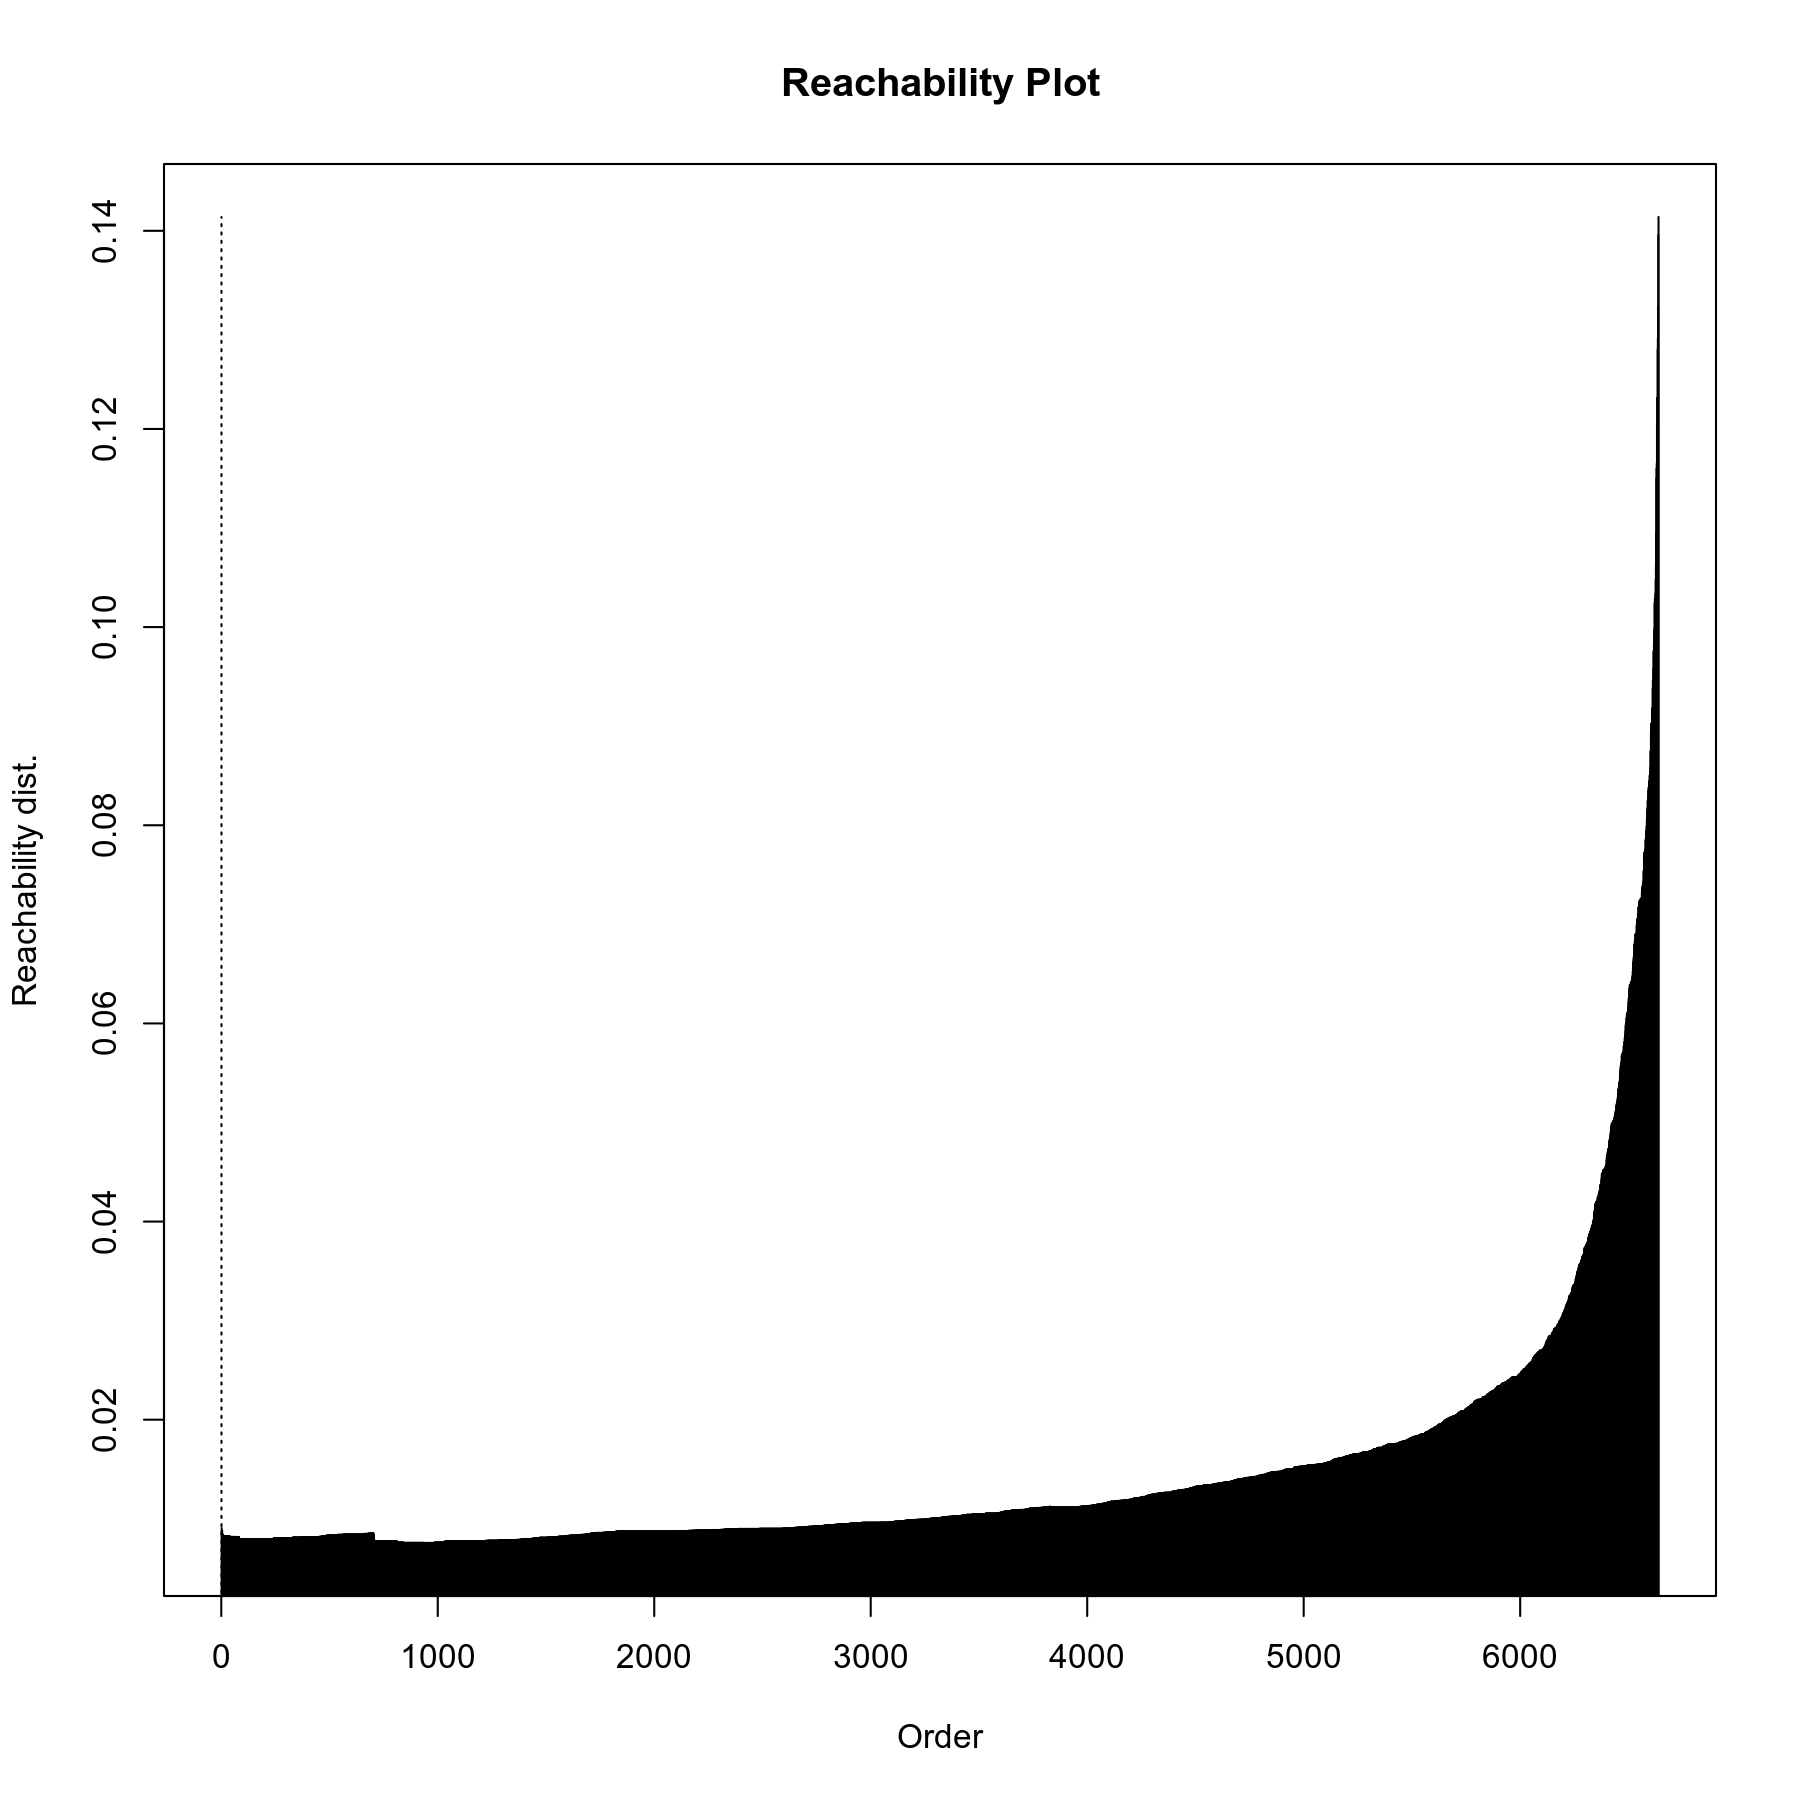

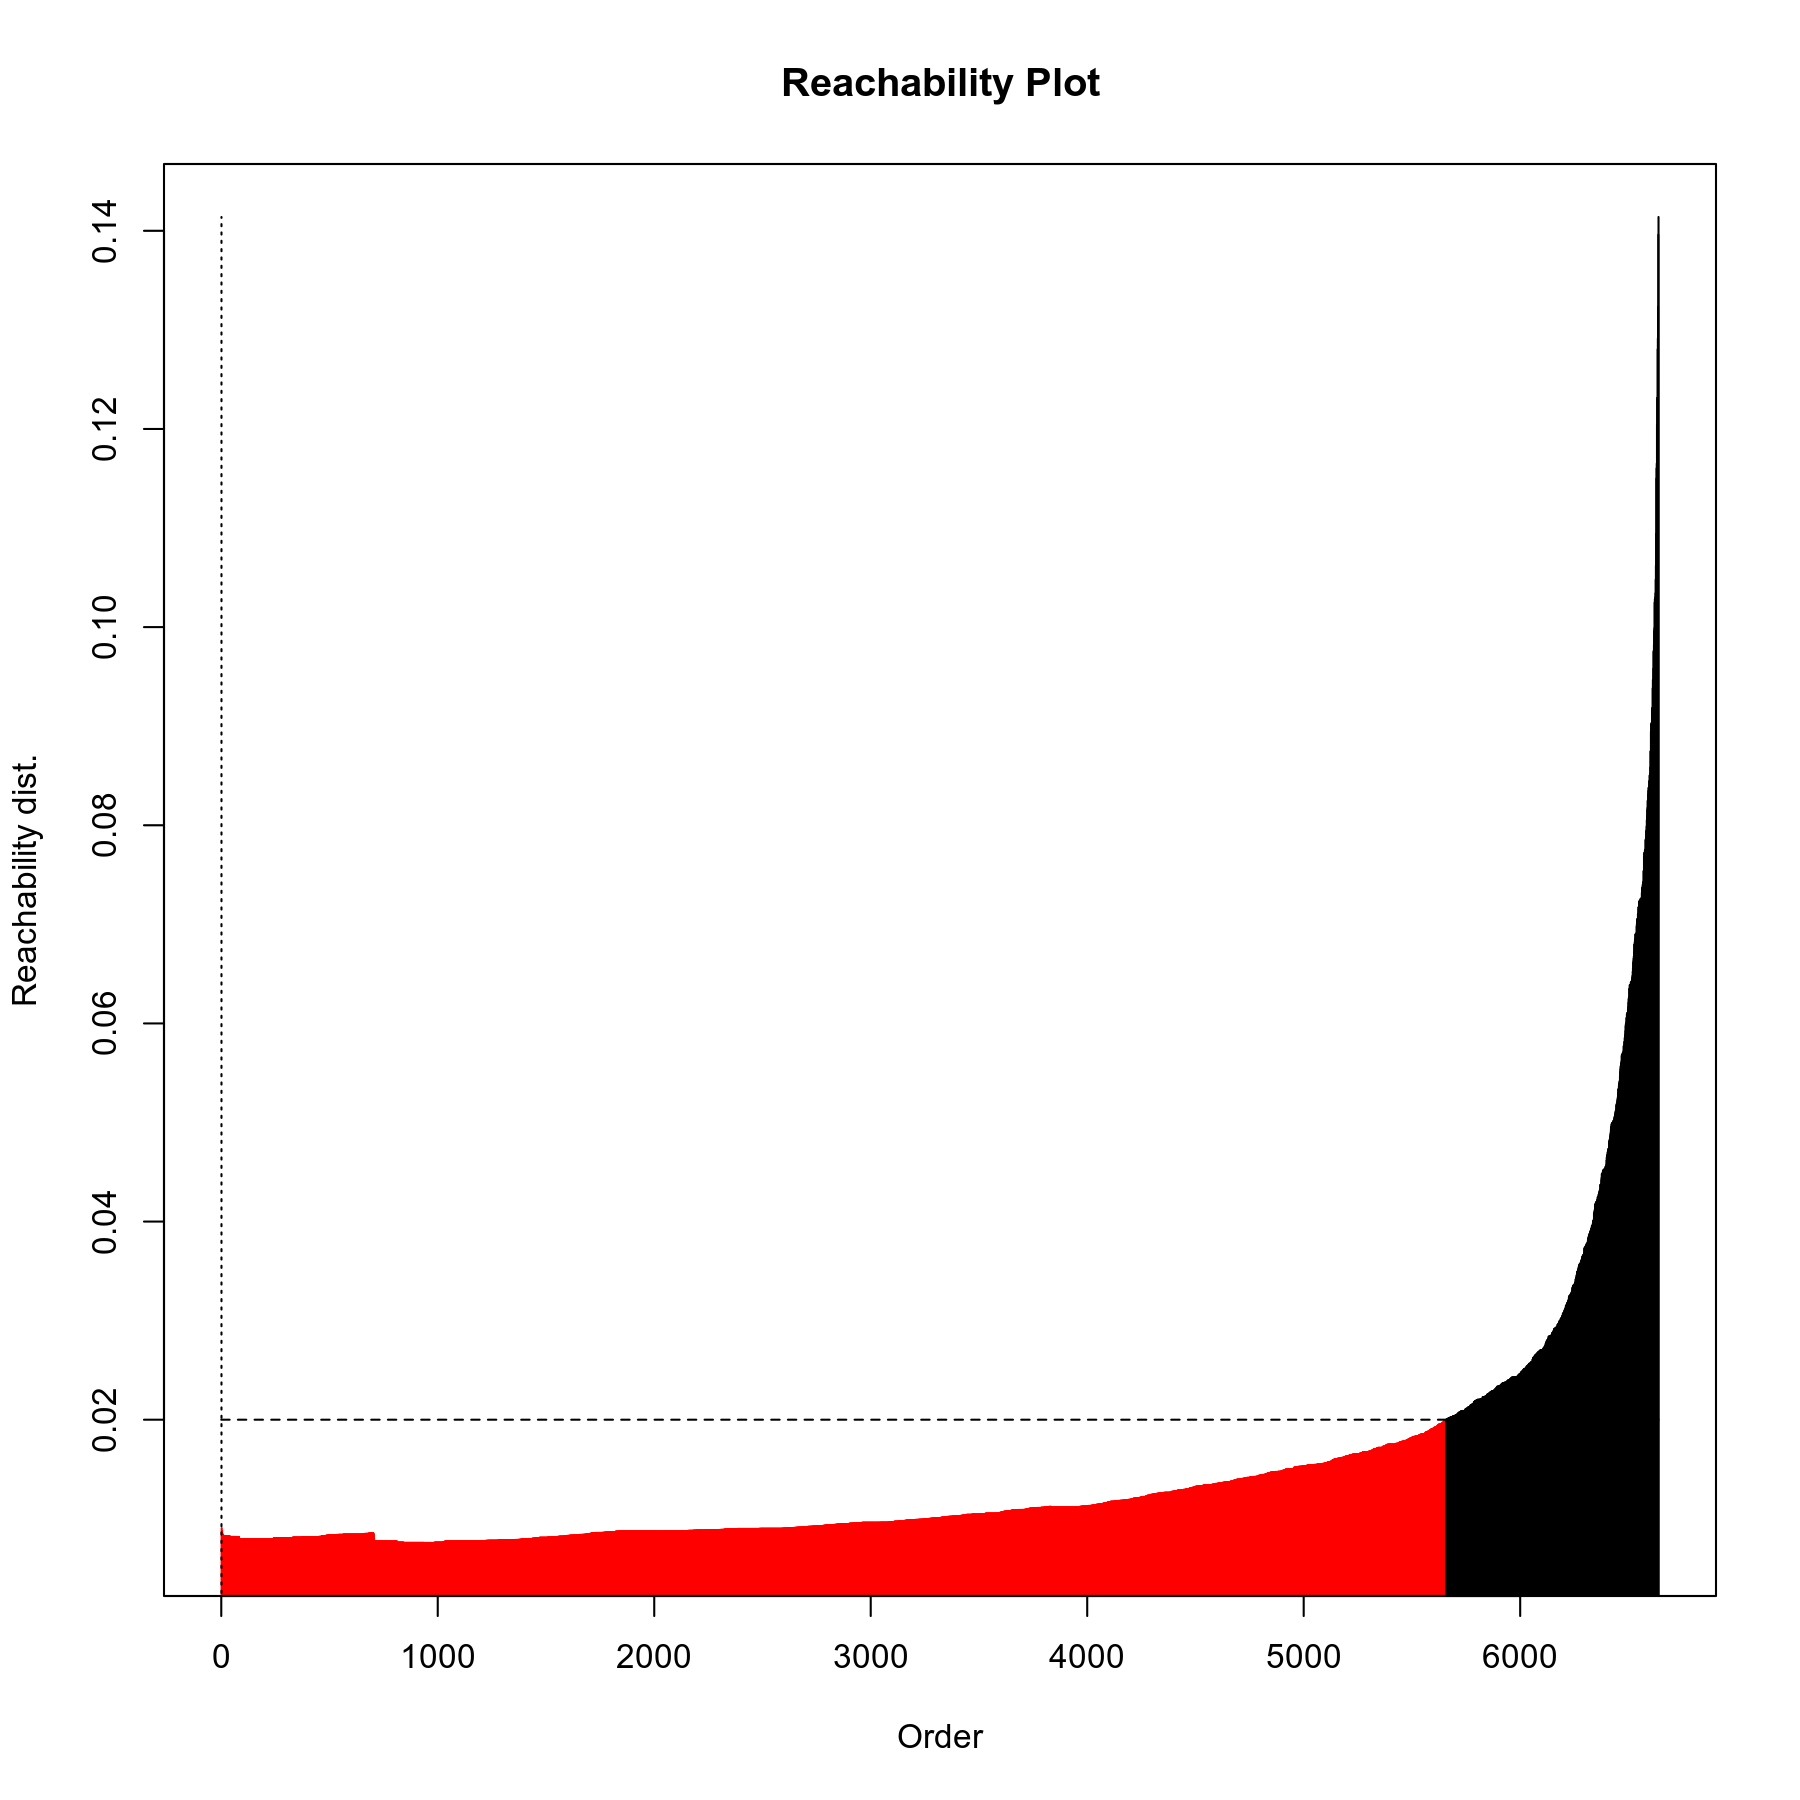

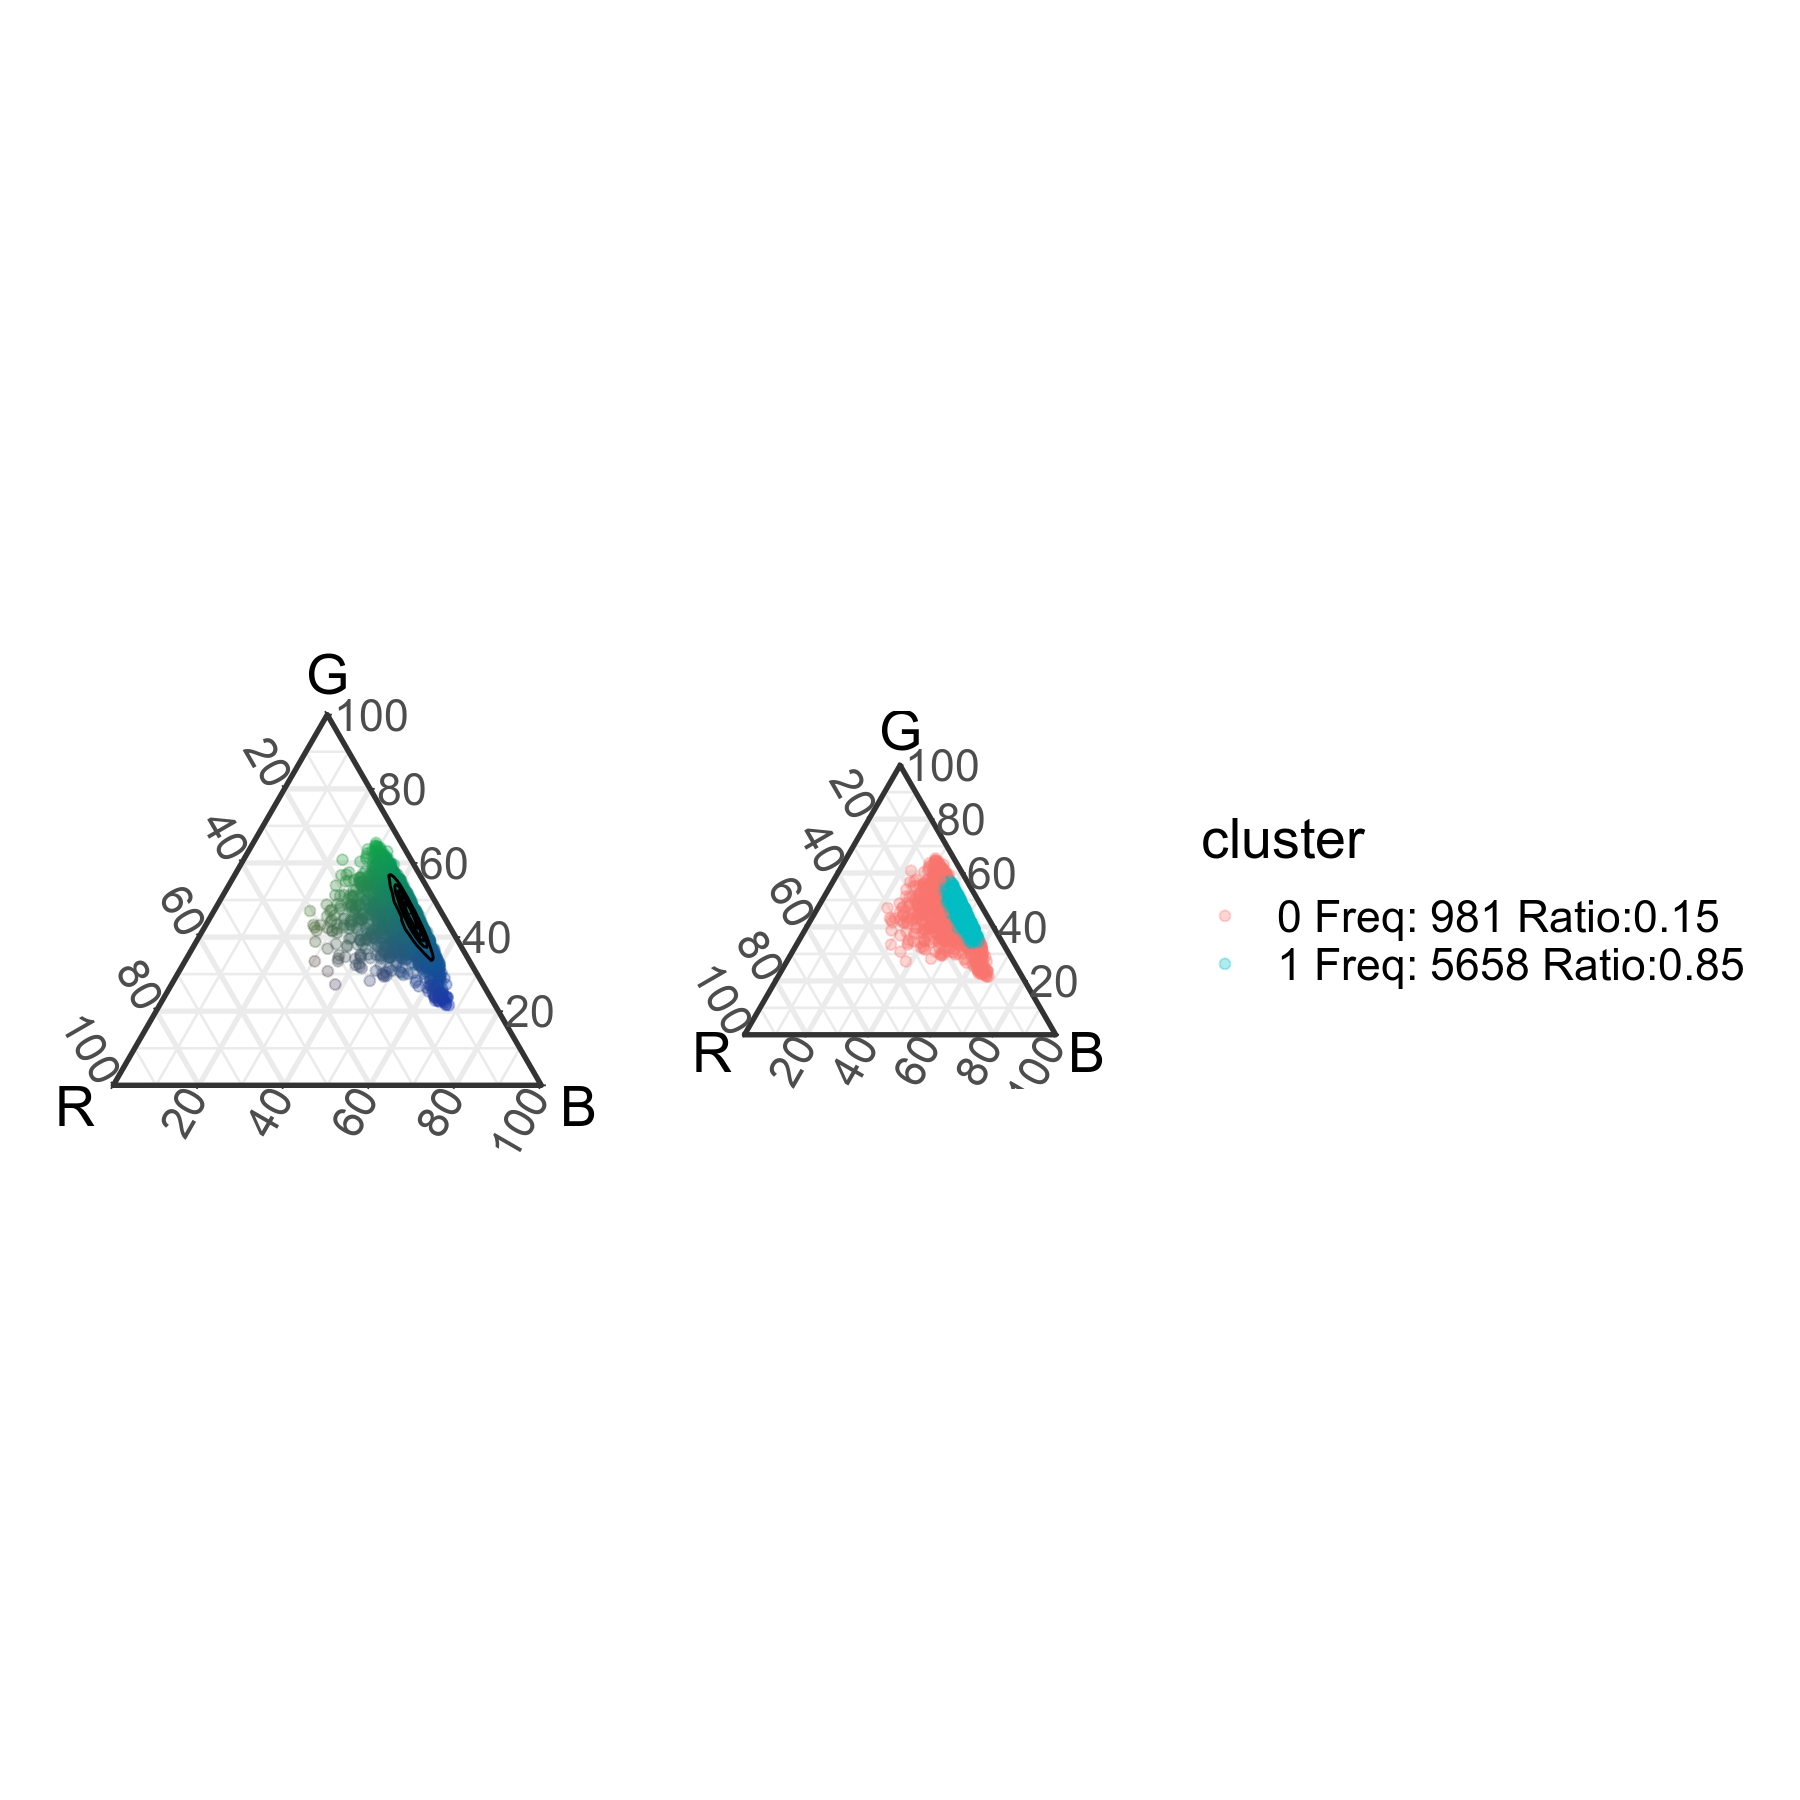

In [108]:
%%R -i D -w 9 -h 9 --units in -r 200 

library(patchwork)
D = as.data.frame(D)
# db <- dbscan(D, eps = .5, minPts = 10,  borderPoints = F)
# print(db)
# hdb <- hdbscan(D, minPts = 100)
# print(hdb)

# Clust <- densityClust(D, gaussian=TRUE)
# p4 = qplot(Clust$rho, Clust$delta, xlab='rho', ylab='delta', main='Density cluster attributes')
# print(p4) ##  gridExtra::tableGrob(counts),

# Clust <- findClusters(Clust, rho=0.875, delta=0.06)
# counts = as.data.frame(table(Clust$clusters))
# counts$Ratio = round(counts$Freq/sum(counts$Freq), 2)
# D$col = apply(D, 1, function(x) {rgb(x[1], x[2], x[3])})
# print(head(D))
# print(dim(D))
# D$cluster = factor(Clust$clusters)
# levels(D$cluster) = paste0(levels(D$cluster), " Freq: ", counts[,2], " Ratio:", counts[,3])
# colnames(D) = c("R", "G", "B", "col", 'cluster')
# col = D$col
# names(col) = D$ID
# colnames(D) = c("R", "G", "B", "col", 'cluster')
# print(head(D))
# p1 = ggtern(D,aes(R,G,B)) +
#  geom_point(color = col, alpha=.3) + 
#  geom_density_tern(bins=6, color='black', lwd=.5) + theme_bw(base_size = 20, base_family = "")

# p2 = ggtern(D,aes(R,G,B, color=cluster)) + theme_bw(base_size = 20, base_family = "") + 
#    geom_point(alpha=.3)

res = dbscan::optics(D, eps=1, minPts=200)
plot(res)

res <- dbscan::extractDBSCAN(res, eps_cl = 0.02)
print(res)
print(str(res))
plot(res)

# Clust <- densityClust(D, gaussian=TRUE)
# p4 = qplot(Clust$rho, Clust$delta, xlab='rho', ylab='delta', main='Density cluster attributes')
# Clust <- findClusters(Clust, rho=0.9, delta=0.2)

counts = as.data.frame(table(res$cluster))
counts$Ratio = round(counts$Freq/sum(counts$Freq), 2)
print(counts)

D$col = apply(D, 1, function(x) {rgb(x[1], x[2], x[3])})
print(head(D))
print(dim(D))
# D$cluster = factor(Clust$clusters)
D$cluster = factor(res$cluster)
levels(D$cluster) = paste0(levels(D$cluster), " Freq: ", counts[,2], " Ratio:", counts[,3])
colnames(D) = c("R", "G", "B", "col", 'cluster')
col = D$col
names(col) = D$ID
colnames(D) = c("R", "G", "B", "col", 'cluster')
print(head(D))
p1 = ggtern(D,aes(R,G,B)) +
 geom_point(color = col, alpha=.3) + 
 geom_density_tern(bins=6, color='black', lwd=.5) + theme_bw(base_size = 20, base_family = "")

p2 = ggtern(D,aes(R,G,B, color=cluster)) + theme_bw(base_size = 20, base_family = "") + 
   geom_point(alpha=.3)

out = ggtern::grid.arrange(p1, p2, ncol=2, widths=c(1, 1.75))
ggsave('Tumor3_cluster.pdf', out, width=18, height=6)
# D = as.data.frame(D)
# D$col = apply(D, 1, function(x) {rgb(x[1], x[2], x[3])})
# print(head(D))
# print(dim(D))
# colnames(D) = c("R", "G", "B", "col")
# ggtern(data=D,aes(x=R,y=G,z=B),aes(x,y,z)) + 
#   stat_density_tern(geom="polygon",color='black',
#                     n=400,h=0.75,expand = 1.1, bins=100,
#                     base='identity',
#                     aes(fill = ..level..), #weight = d
#                     na.rm = TRUE) +  # geom_point(color="black",size=5,shape=21) + #geom_text(aes(label=id),size=3) + 
#   scale_fill_gradient(low="yellow",high="red") + 
#   scale_color_gradient(low="yellow",high="red") + 
#   theme_rgbw() + 
#   theme(legend.justification=c(0,1), legend.position=c(0,1)) +
#   theme_gridsontop() + 
#   guides(fill = guide_colorbar(order=1),color="none") + 
#   labs(title= "Ternary Plot and Filled Contour",fill = "Value, V")

In [21]:
D = Ds[3]
print(len(D))

17233


OPTICS ordering/clustering for 17233 objects.
Parameters: minPts = 200, eps = 1, eps_cl = 0.046, xi = NA
The clustering contains 1 cluster(s) and 444 noise points.

    0     1 
  444 16789 

Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi, cluster
List of 9
 $ order      : int [1:17233] 1 16415 16041 15953 16987 16511 16416 17059 15803 15795 ...
 $ reachdist  : num [1:17233] Inf 0.0255 0.0297 0.029 0.0335 ...
 $ coredist   : num [1:17233] 0.0271 0.0287 0.0405 0.0384 0.0428 ...
 $ predecessor: int [1:17233] NA 14220 375 1171 1327 1193 1976 13 1000 2032 ...
 $ minPts     : num 200
 $ eps        : num 1
 $ eps_cl     : num 0.046
 $ xi         : logi NA
 $ cluster    : int [1:17233] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "class")= chr "optics"
NULL
  cluster  Freq Ratio
1       0   444  0.03
2       1 16789  0.97
          V1        V2        V3     col
1 0.14799118 0.3558351 0.4961737 #265B7F
2 0.15837027 0.3820152 0.4596145 #286175
3 0.13

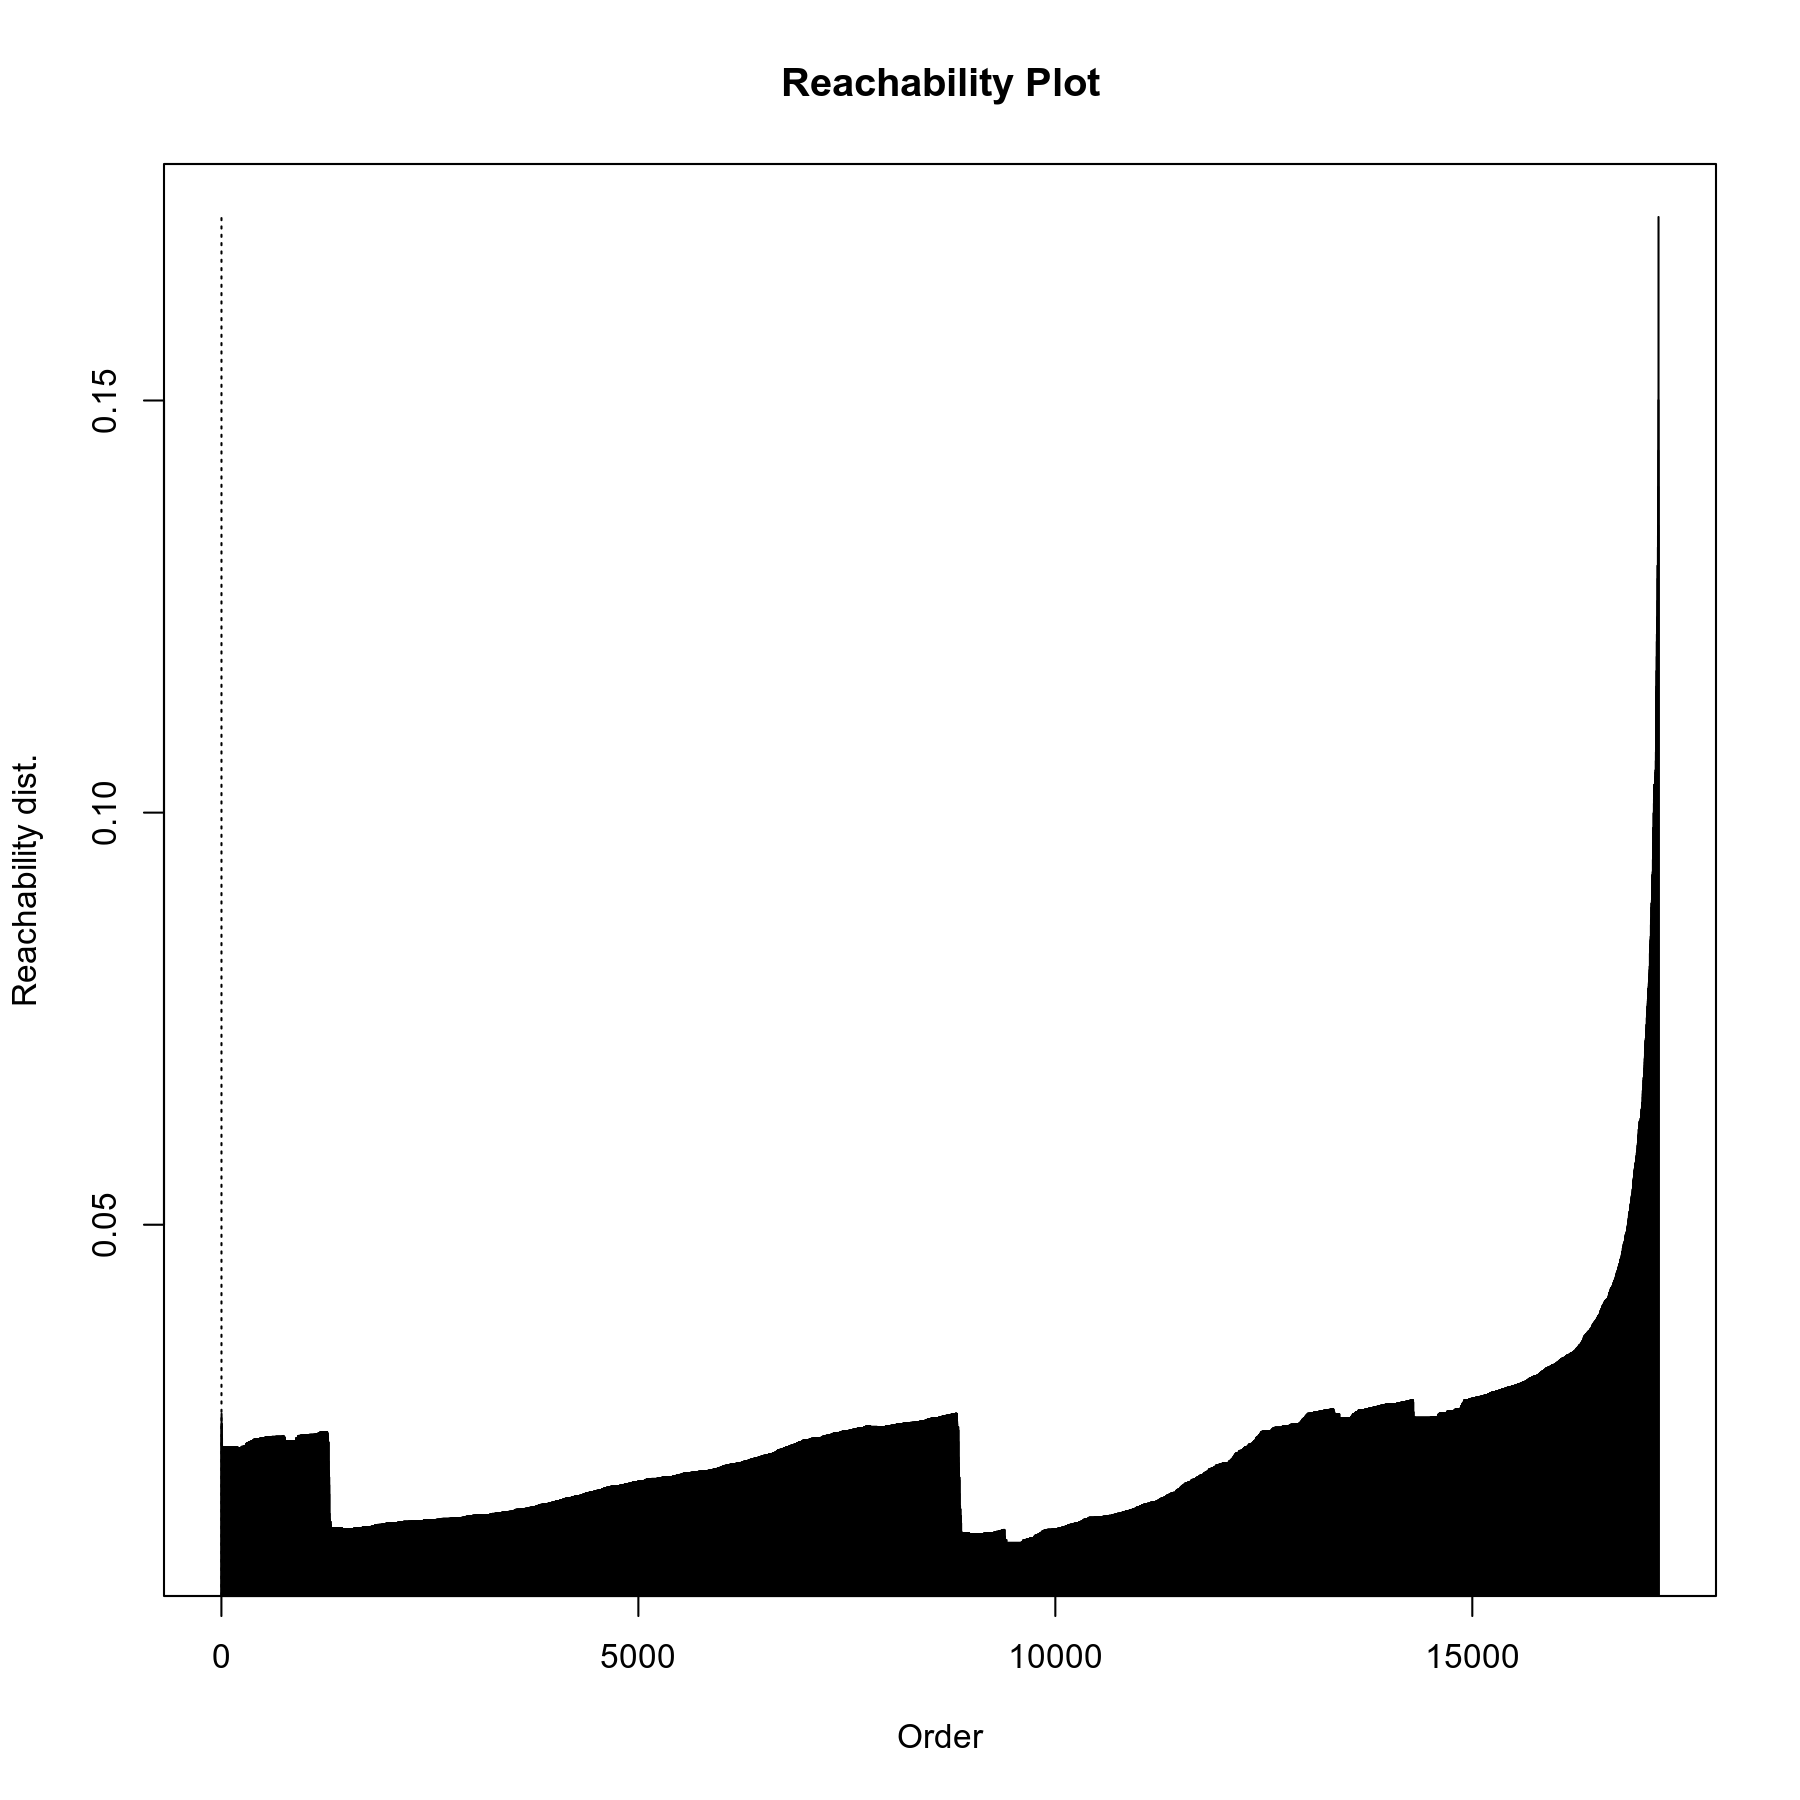

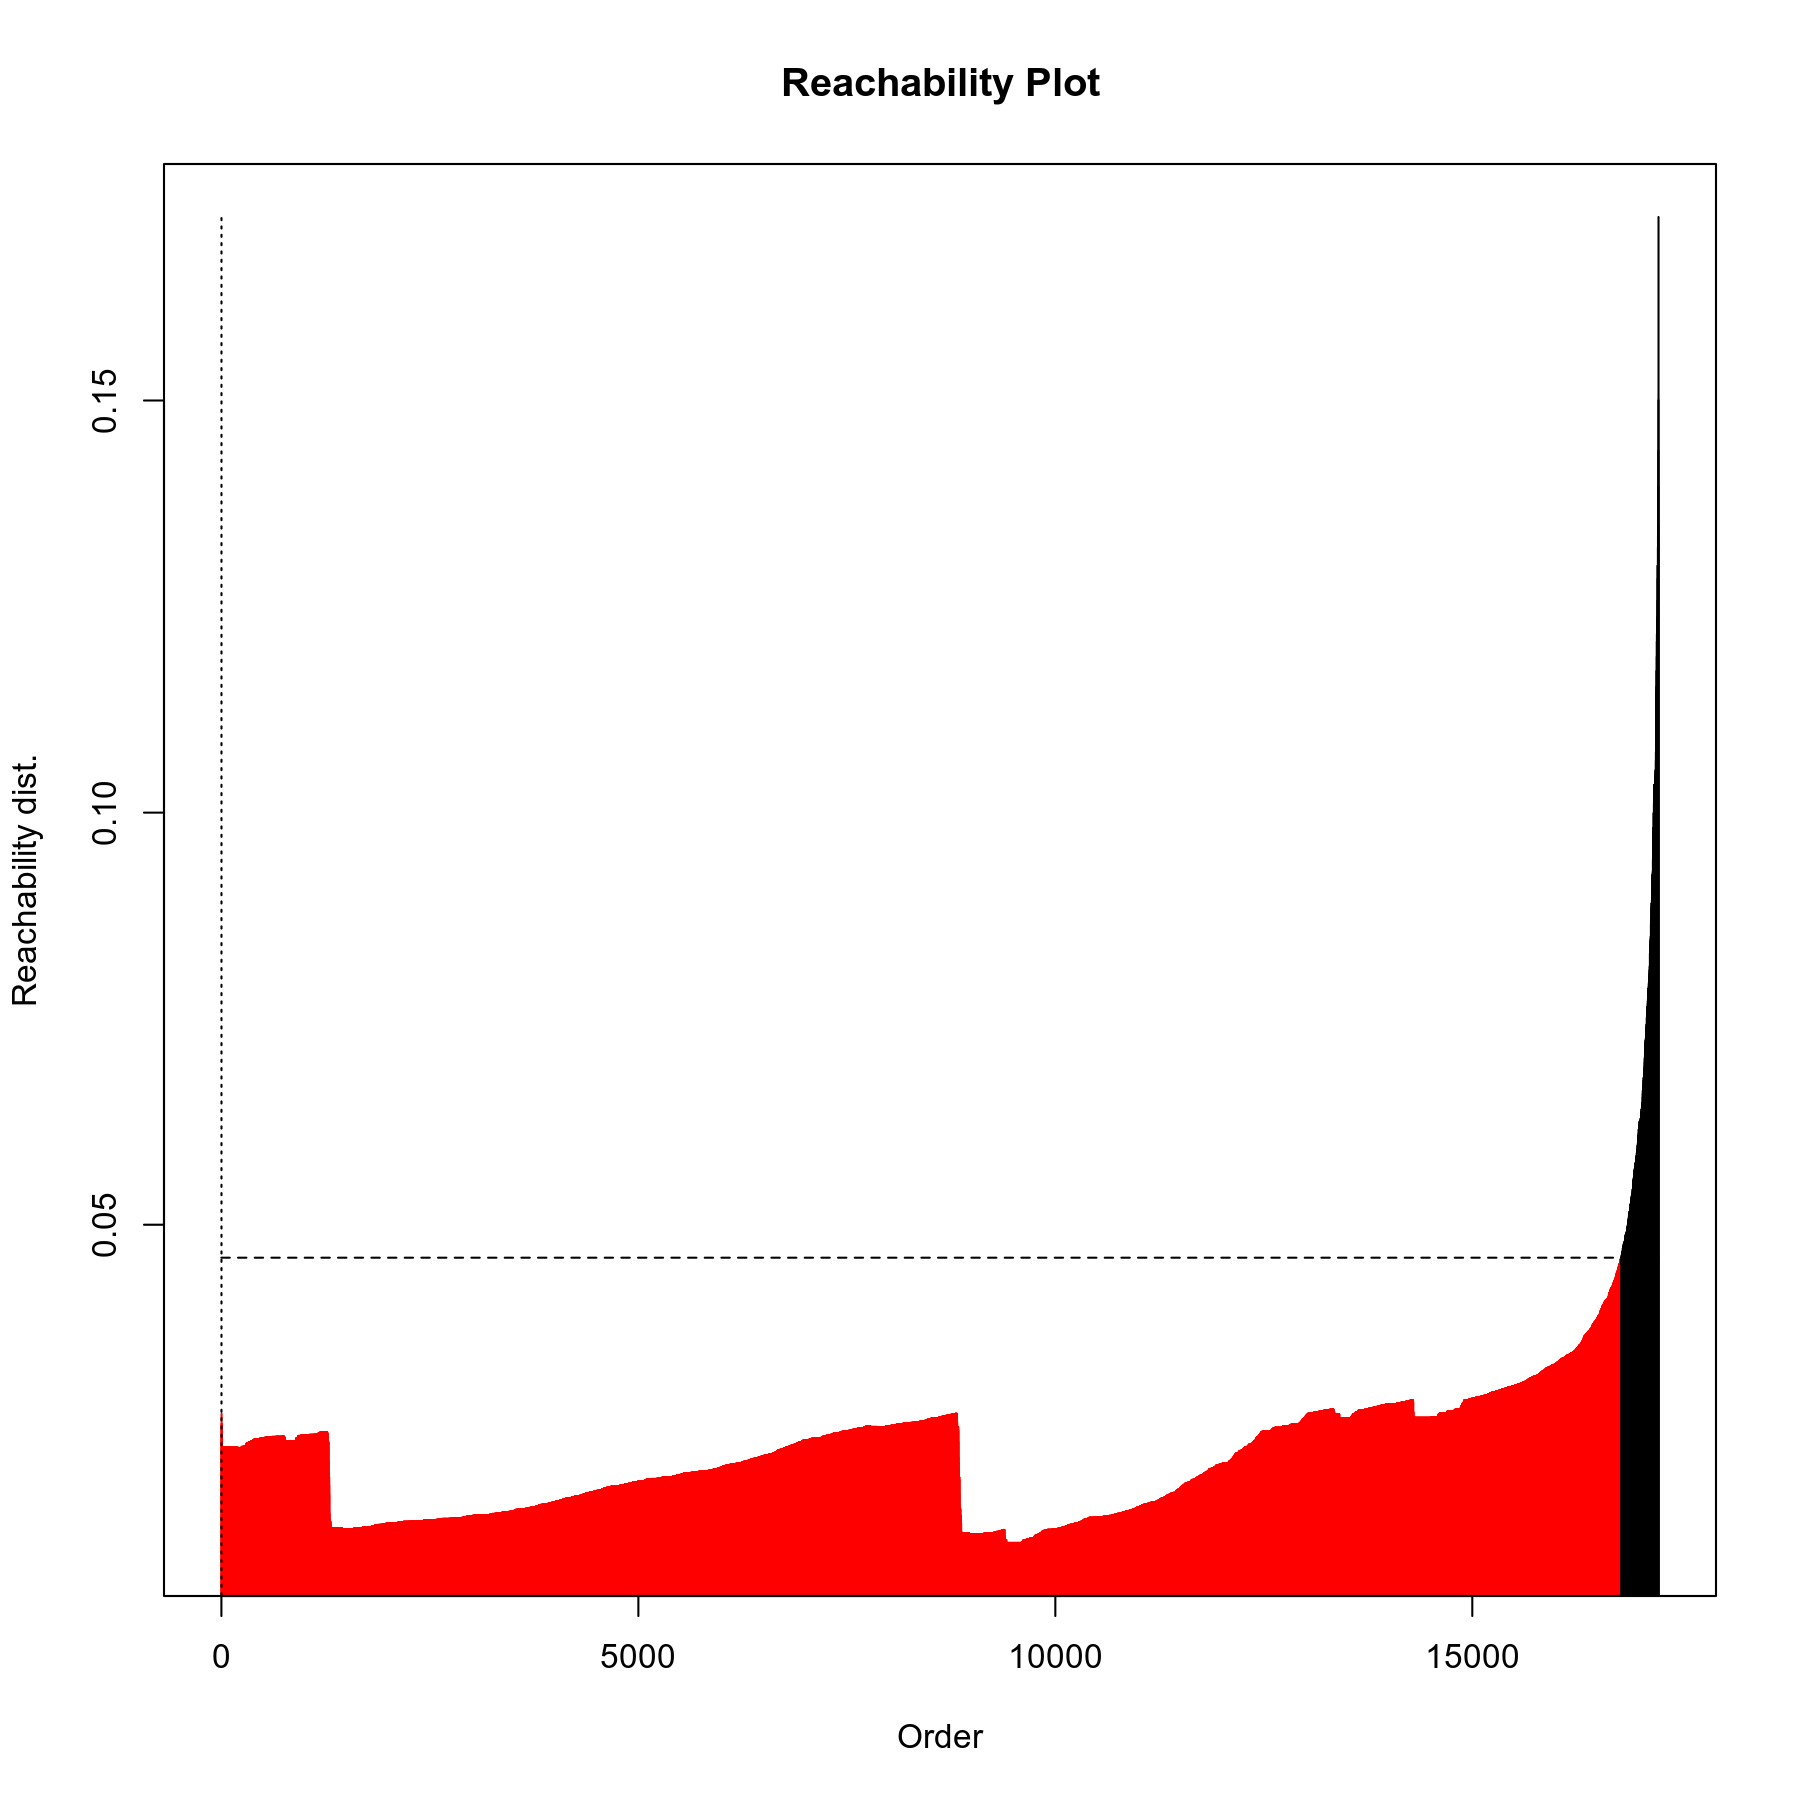

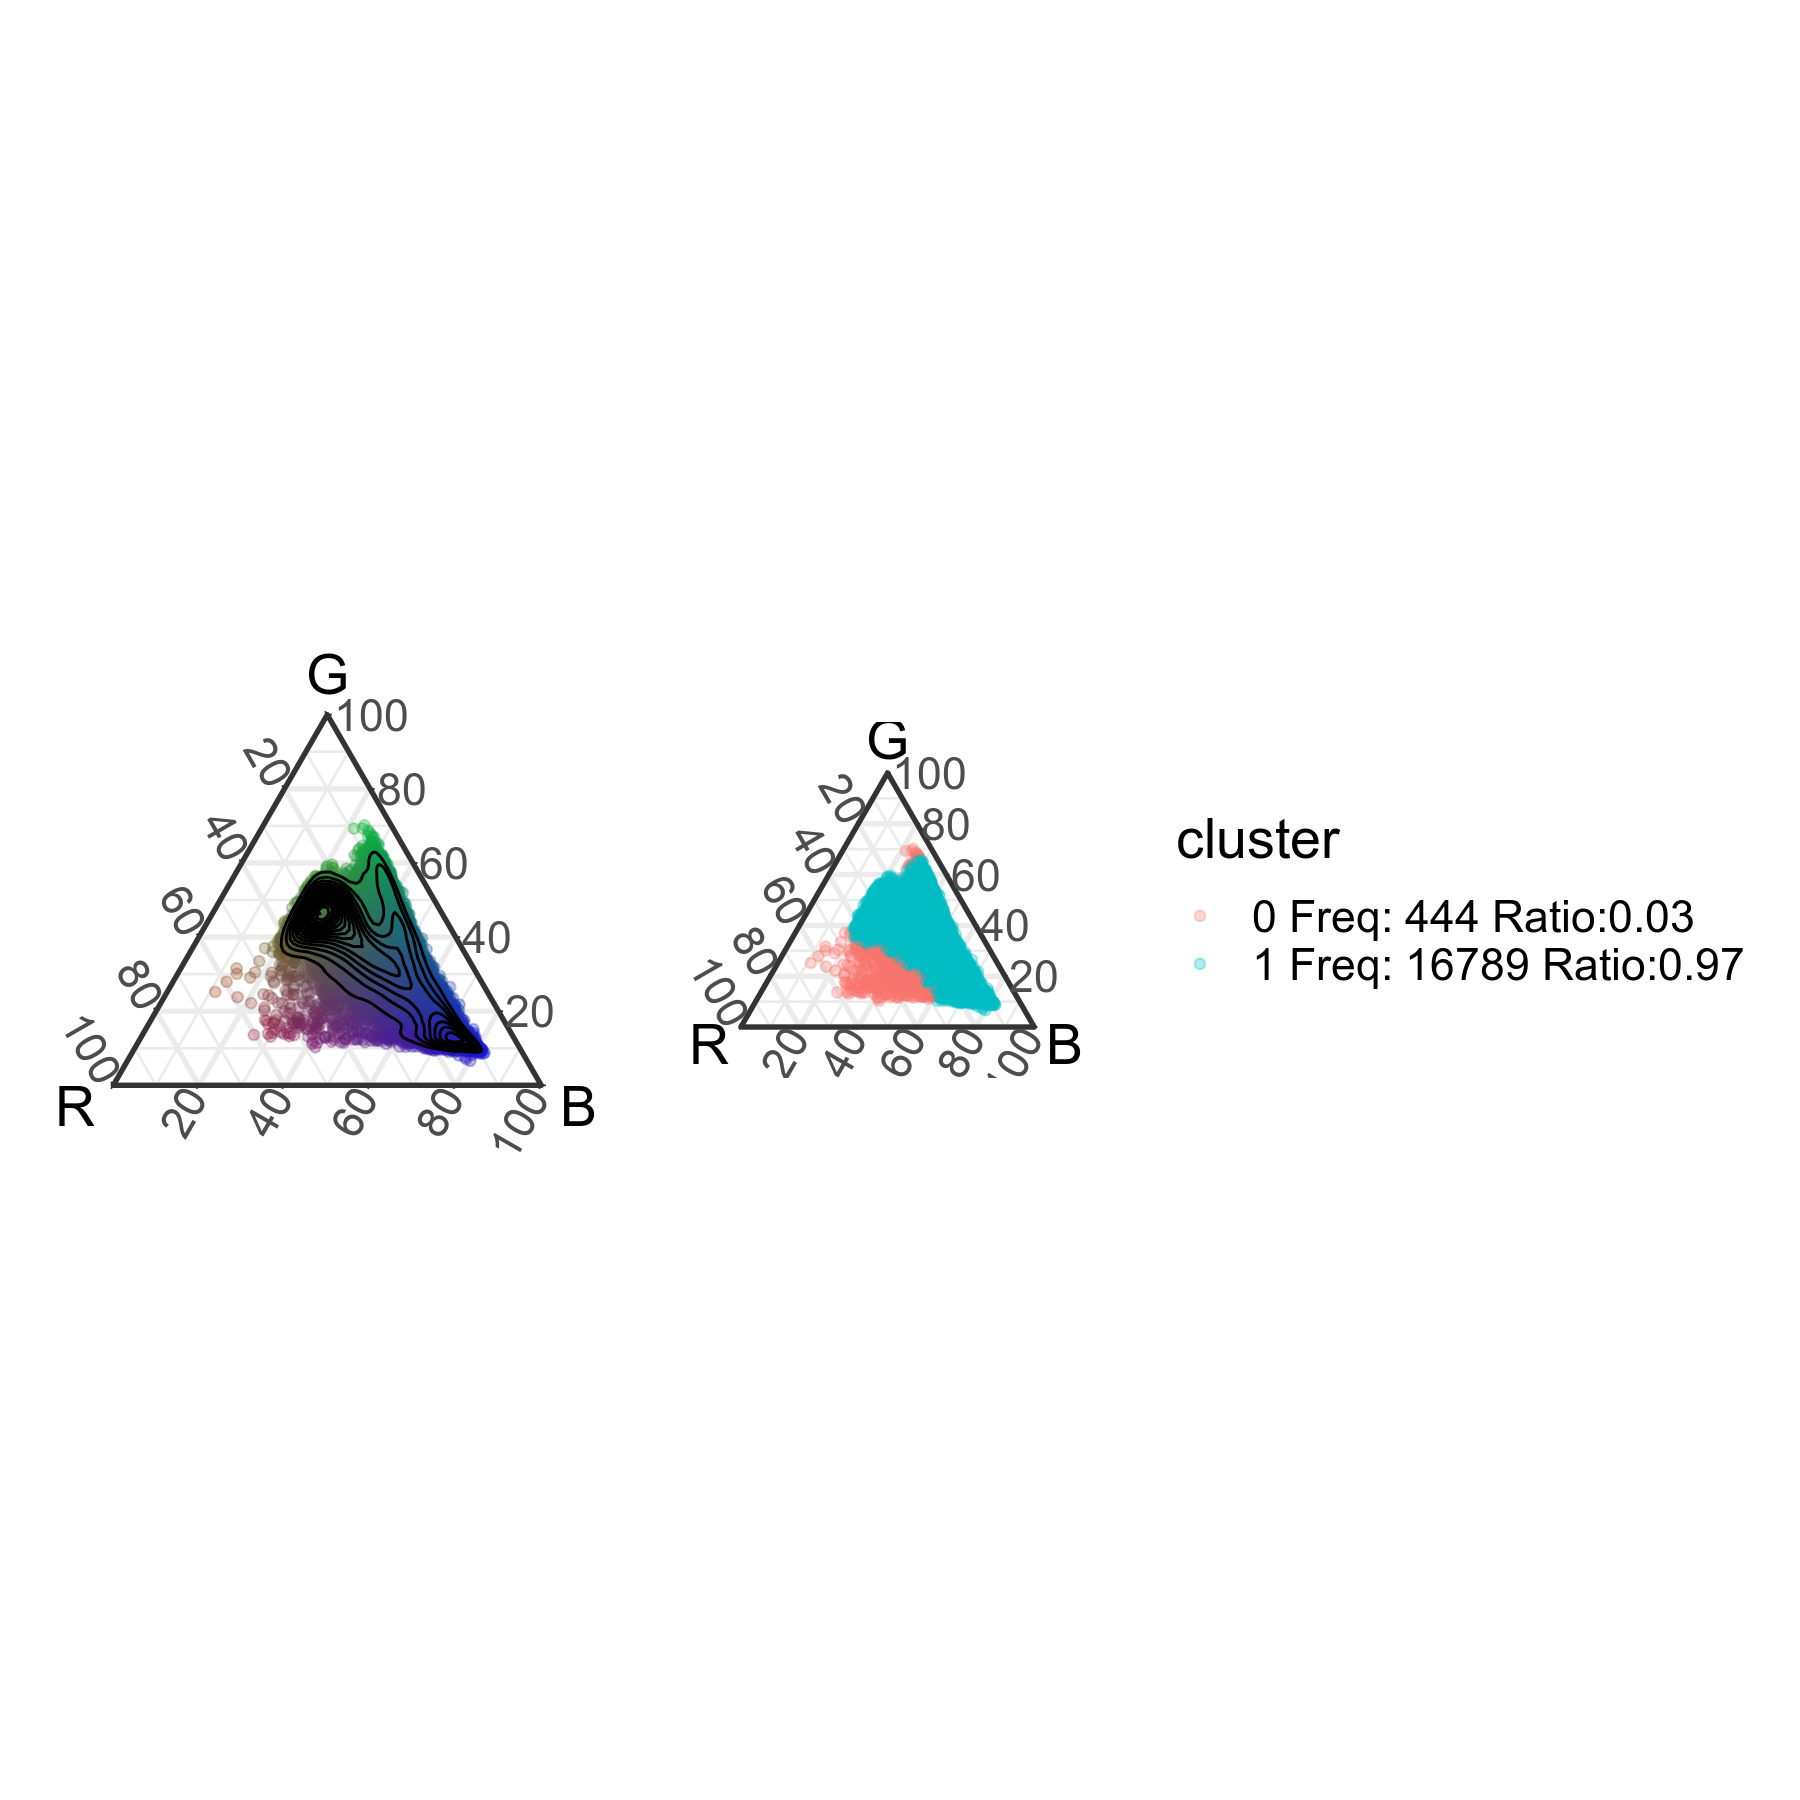

In [22]:
%%R -i D -w 9 -h 9 --units in -r 200 

library(patchwork)
D = as.data.frame(D)
# db <- dbscan(D, eps = .5, minPts = 10,  borderPoints = F)
# print(db)
# hdb <- hdbscan(D, minPts = 100)
# print(hdb)

# Clust <- densityClust(D, gaussian=TRUE)
# p4 = qplot(Clust$rho, Clust$delta, xlab='rho', ylab='delta', main='Density cluster attributes')
# print(p4) ##  gridExtra::tableGrob(counts),

# Clust <- findClusters(Clust, rho=0.925, delta=0.2)
# counts = as.data.frame(table(Clust$clusters))
# counts$Ratio = round(counts$Freq/sum(counts$Freq), 2)
# D$col = apply(D, 1, function(x) {rgb(x[1], x[2], x[3])})
# print(head(D))
# print(dim(D))
# D$cluster = factor(Clust$clusters)
# levels(D$cluster) = paste0(levels(D$cluster), " Freq: ", counts[,2], " Ratio:", counts[,3])
# colnames(D) = c("R", "G", "B", "col", 'cluster')
# col = D$col
# names(col) = D$ID
# colnames(D) = c("R", "G", "B", "col", 'cluster')
# print(head(D))
# p1 = ggtern(D,aes(R,G,B)) +
#  geom_point(color = col, alpha=.3) + 
#  geom_density_tern(bins=15, color='black', lwd=.4) + theme_bw(base_size = 20, base_family = "")

# p2 = ggtern(D,aes(R,G,B, color=cluster)) + theme_bw(base_size = 20, base_family = "") + 
#    geom_point(alpha=.3)

res = dbscan::optics(D, eps=1, minPts=200)
plot(res)

res <- dbscan::extractDBSCAN(res, eps_cl = 0.046)
print(res)
print(str(res))
plot(res)

# Clust <- densityClust(D, gaussian=TRUE)
# p4 = qplot(Clust$rho, Clust$delta, xlab='rho', ylab='delta', main='Density cluster attributes')
# Clust <- findClusters(Clust, rho=0.9, delta=0.2)

cluster = res$cluster
counts = as.data.frame(table(cluster))
counts$Ratio = round(counts$Freq/sum(counts$Freq), 2)
print(counts)

D$col = apply(D, 1, function(x) {rgb(x[1], x[2], x[3])})
print(head(D))
print(dim(D))
# D$cluster = factor(Clust$clusters)
D$cluster = factor(res$cluster)
levels(D$cluster) = paste0(levels(D$cluster), " Freq: ", counts[,2], " Ratio:", counts[,3])
colnames(D) = c("R", "G", "B", "col", 'cluster')
col = D$col
names(col) = D$ID
colnames(D) = c("R", "G", "B", "col", 'cluster')
print(head(D))
p1 = ggtern(D,aes(R,G,B)) +
 geom_point(color = col, alpha=.3) + 
 geom_density_tern(bins=16, color='black', lwd=.5) + theme_bw(base_size = 20, base_family = "")

p2 = ggtern(D,aes(R,G,B, color=cluster)) + theme_bw(base_size = 20, base_family = "") + 
   geom_point(alpha=.3)

out = ggtern::grid.arrange(p1, p2, ncol=2, widths=c(1, 1.75))
ggsave('Tumor4_cluster.pdf', out, width=18, height=6)

# D = as.data.frame(D)
# D$col = apply(D, 1, function(x) {rgb(x[1], x[2], x[3])})
# print(head(D))
# print(dim(D))
# colnames(D) = c("R", "G", "B", "col")
# ggtern(data=D,aes(x=R,y=G,z=B),aes(x,y,z)) + 
#   stat_density_tern(geom="polygon",color='black',
#                     n=400,h=0.75,expand = 1.1, bins=100,
#                     base='identity',
#                     aes(fill = ..level..), #weight = d
#                     na.rm = TRUE) +  # geom_point(color="black",size=5,shape=21) + #geom_text(aes(label=id),size=3) + 
#   scale_fill_gradient(low="yellow",high="red") + 
#   scale_color_gradient(low="yellow",high="red") + 
#   theme_rgbw() + 
#   theme(legend.justification=c(0,1), legend.position=c(0,1)) +
#   theme_gridsontop() + 
#   guides(fill = guide_colorbar(order=1),color="none") + 
#   labs(title= "Ternary Plot and Filled Contour",fill = "Value, V")

In [170]:
#https://stackoverflow.com/questions/10879361/ternary-plot-and-filled-contour
len(Ds)

4

In [6]:
D = Ds[3]
print(len(D))

2230


R[write to console]: Loading required package: ggplot2

R[write to console]: Registered S3 methods overwritten by 'ggtern':
  method           from   
  +.gg             ggplot2
  grid.draw.ggplot ggplot2
  plot.ggplot      ggplot2
  print.ggplot     ggplot2

R[write to console]: --
Remember to cite, run citation(package = 'ggtern') for further info.
--

R[write to console]: 
Attaching package: ‘ggtern’


R[write to console]: The following objects are masked from ‘package:ggplot2’:

    %+%, aes, annotate, calc_element, ggplot, ggplot_build,
    ggplot_gtable, ggplotGrob, ggsave, layer_data, theme, theme_bw,
    theme_classic, theme_dark, theme_gray, theme_light, theme_linedraw,
    theme_minimal, theme_void




OPTICS ordering/clustering for 2230 objects.
Parameters: minPts = 200, eps = 10, eps_cl = 0.065, xi = NA
The clustering contains 3 cluster(s) and 593 noise points.

  0   1   2   3 
593 895 251 491 

Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi, cluster
List of 9
 $ order      : int [1:2230] 1 2223 2210 2230 2209 2208 2206 2211 2229 2183 ...
 $ reachdist  : num [1:2230] Inf 0.0836 0.0866 0.0699 0.0725 ...
 $ coredist   : num [1:2230] 0.1107 0.1013 0.1255 0.0772 0.0944 ...
 $ predecessor: int [1:2230] NA 2170 113 339 1762 1648 301 1284 6 1044 ...
 $ minPts     : num 200
 $ eps        : num 10
 $ eps_cl     : num 0.065
 $ xi         : logi NA
 $ cluster    : int [1:2230] 0 0 0 0 0 2 0 2 0 0 ...
 - attr(*, "class")= chr "optics"
NULL
  cluster Freq Ratio
1       0  593  0.27
2       1  895  0.40
3       2  251  0.11
4       3  491  0.22
         V1        V2        V3     col
1 0.1129166 0.5142565 0.3728268 #1D835F
2 0.1268176 0.5044

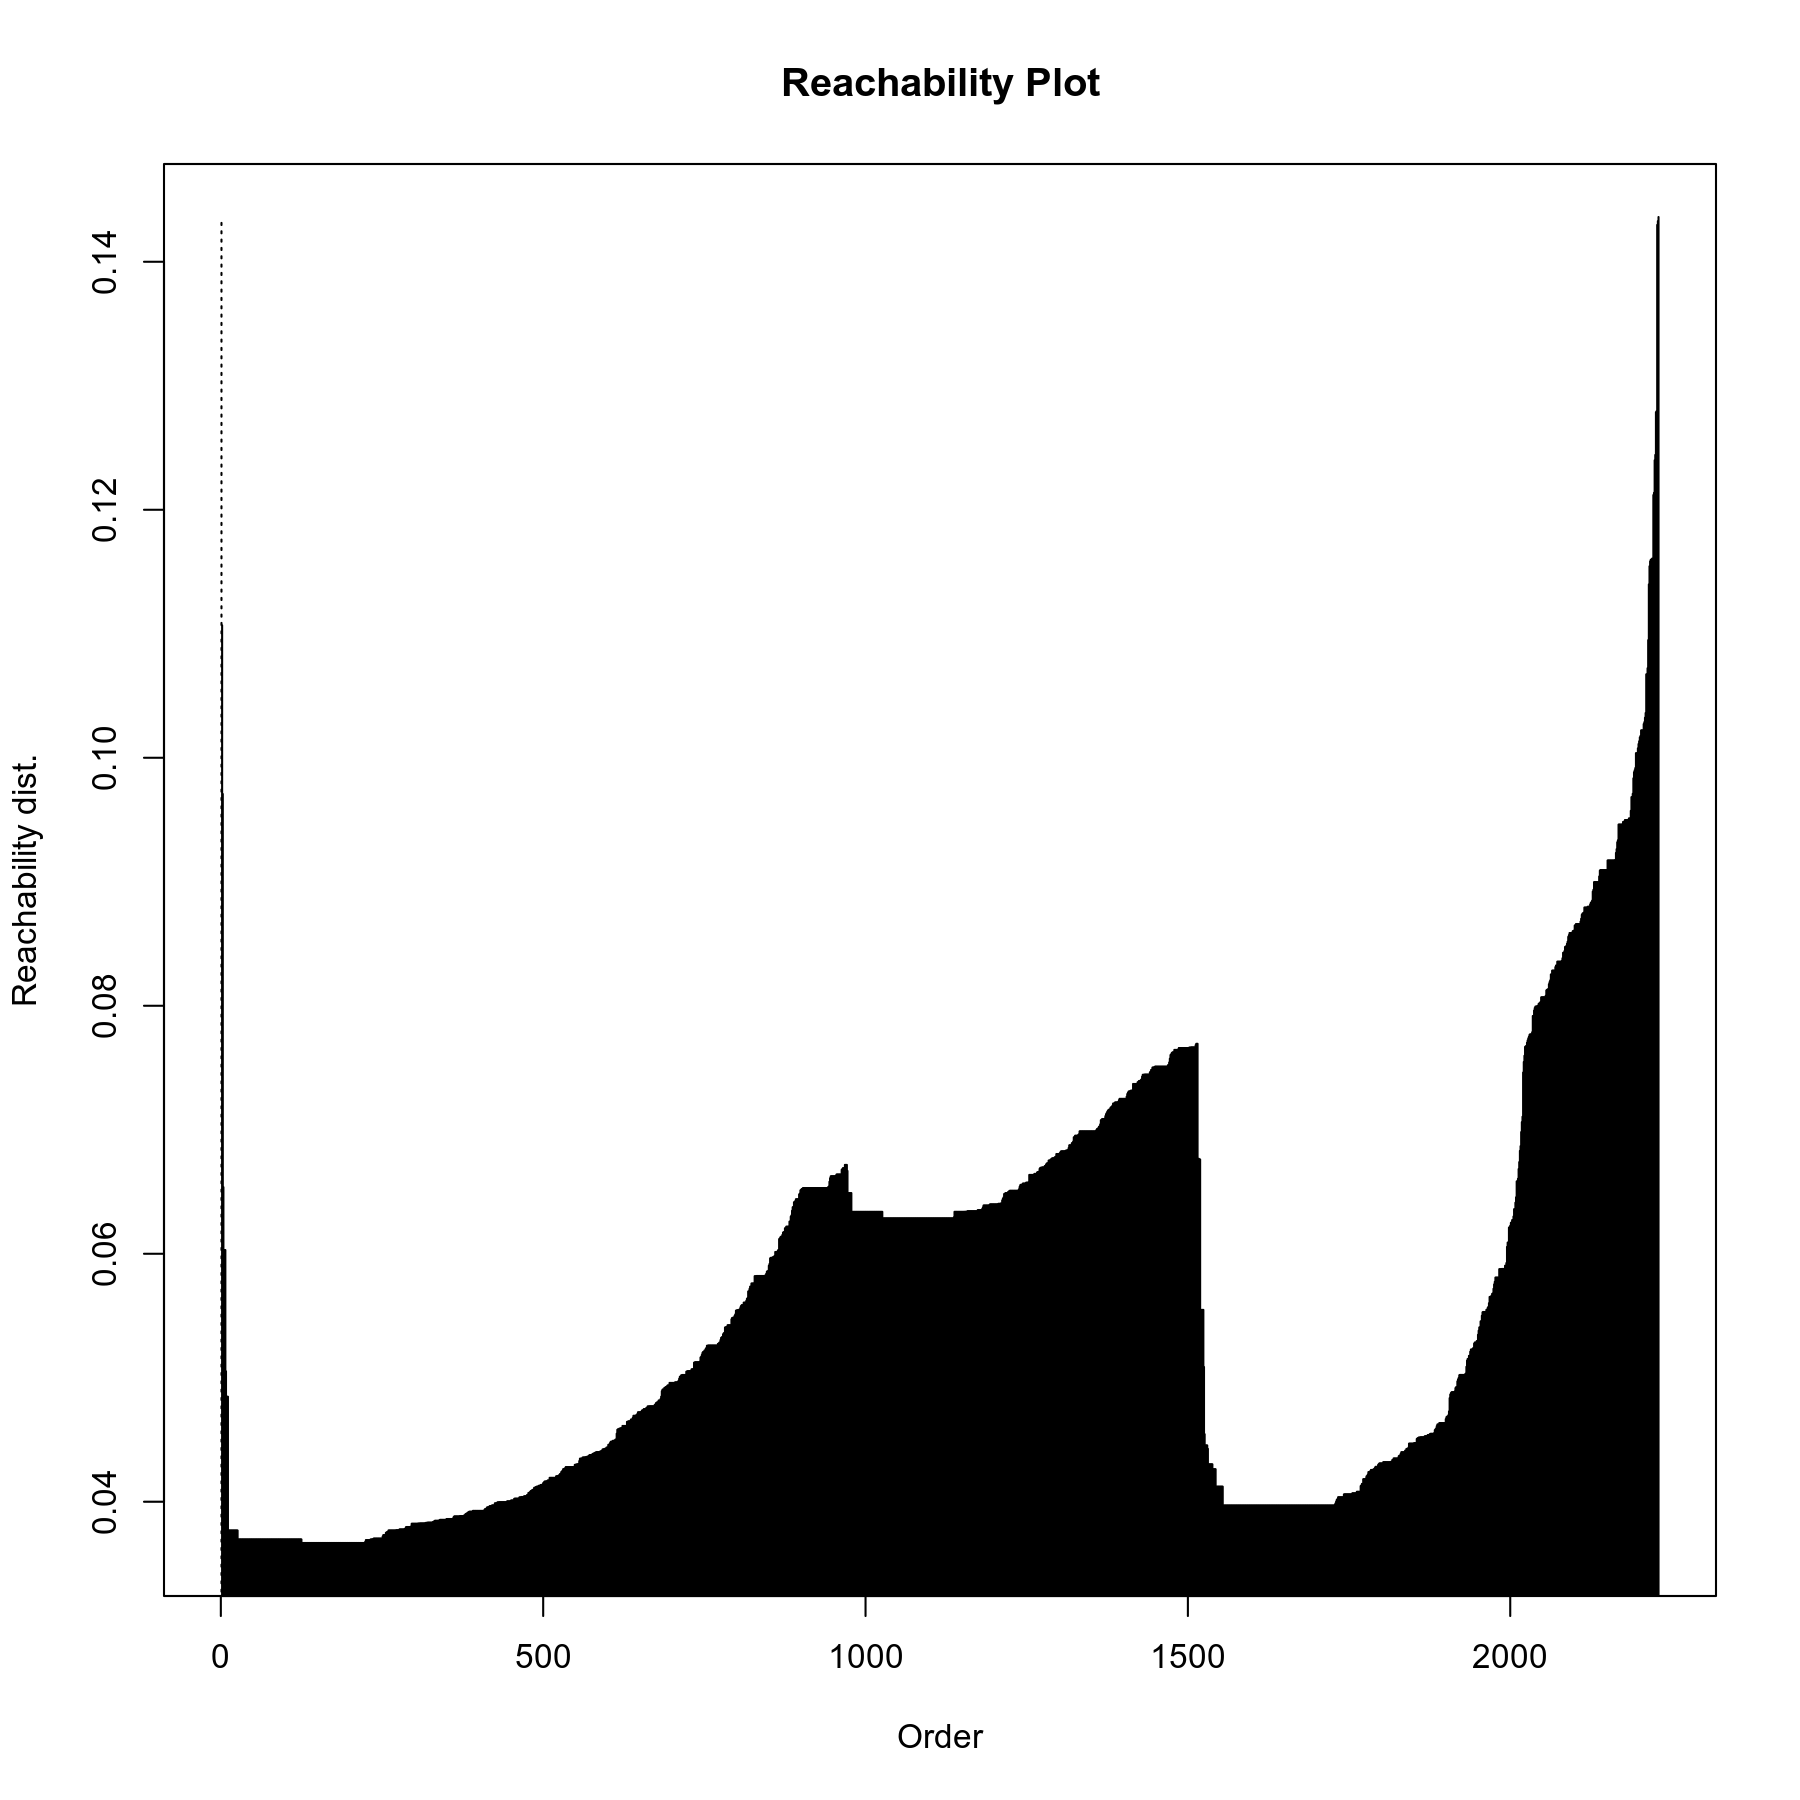

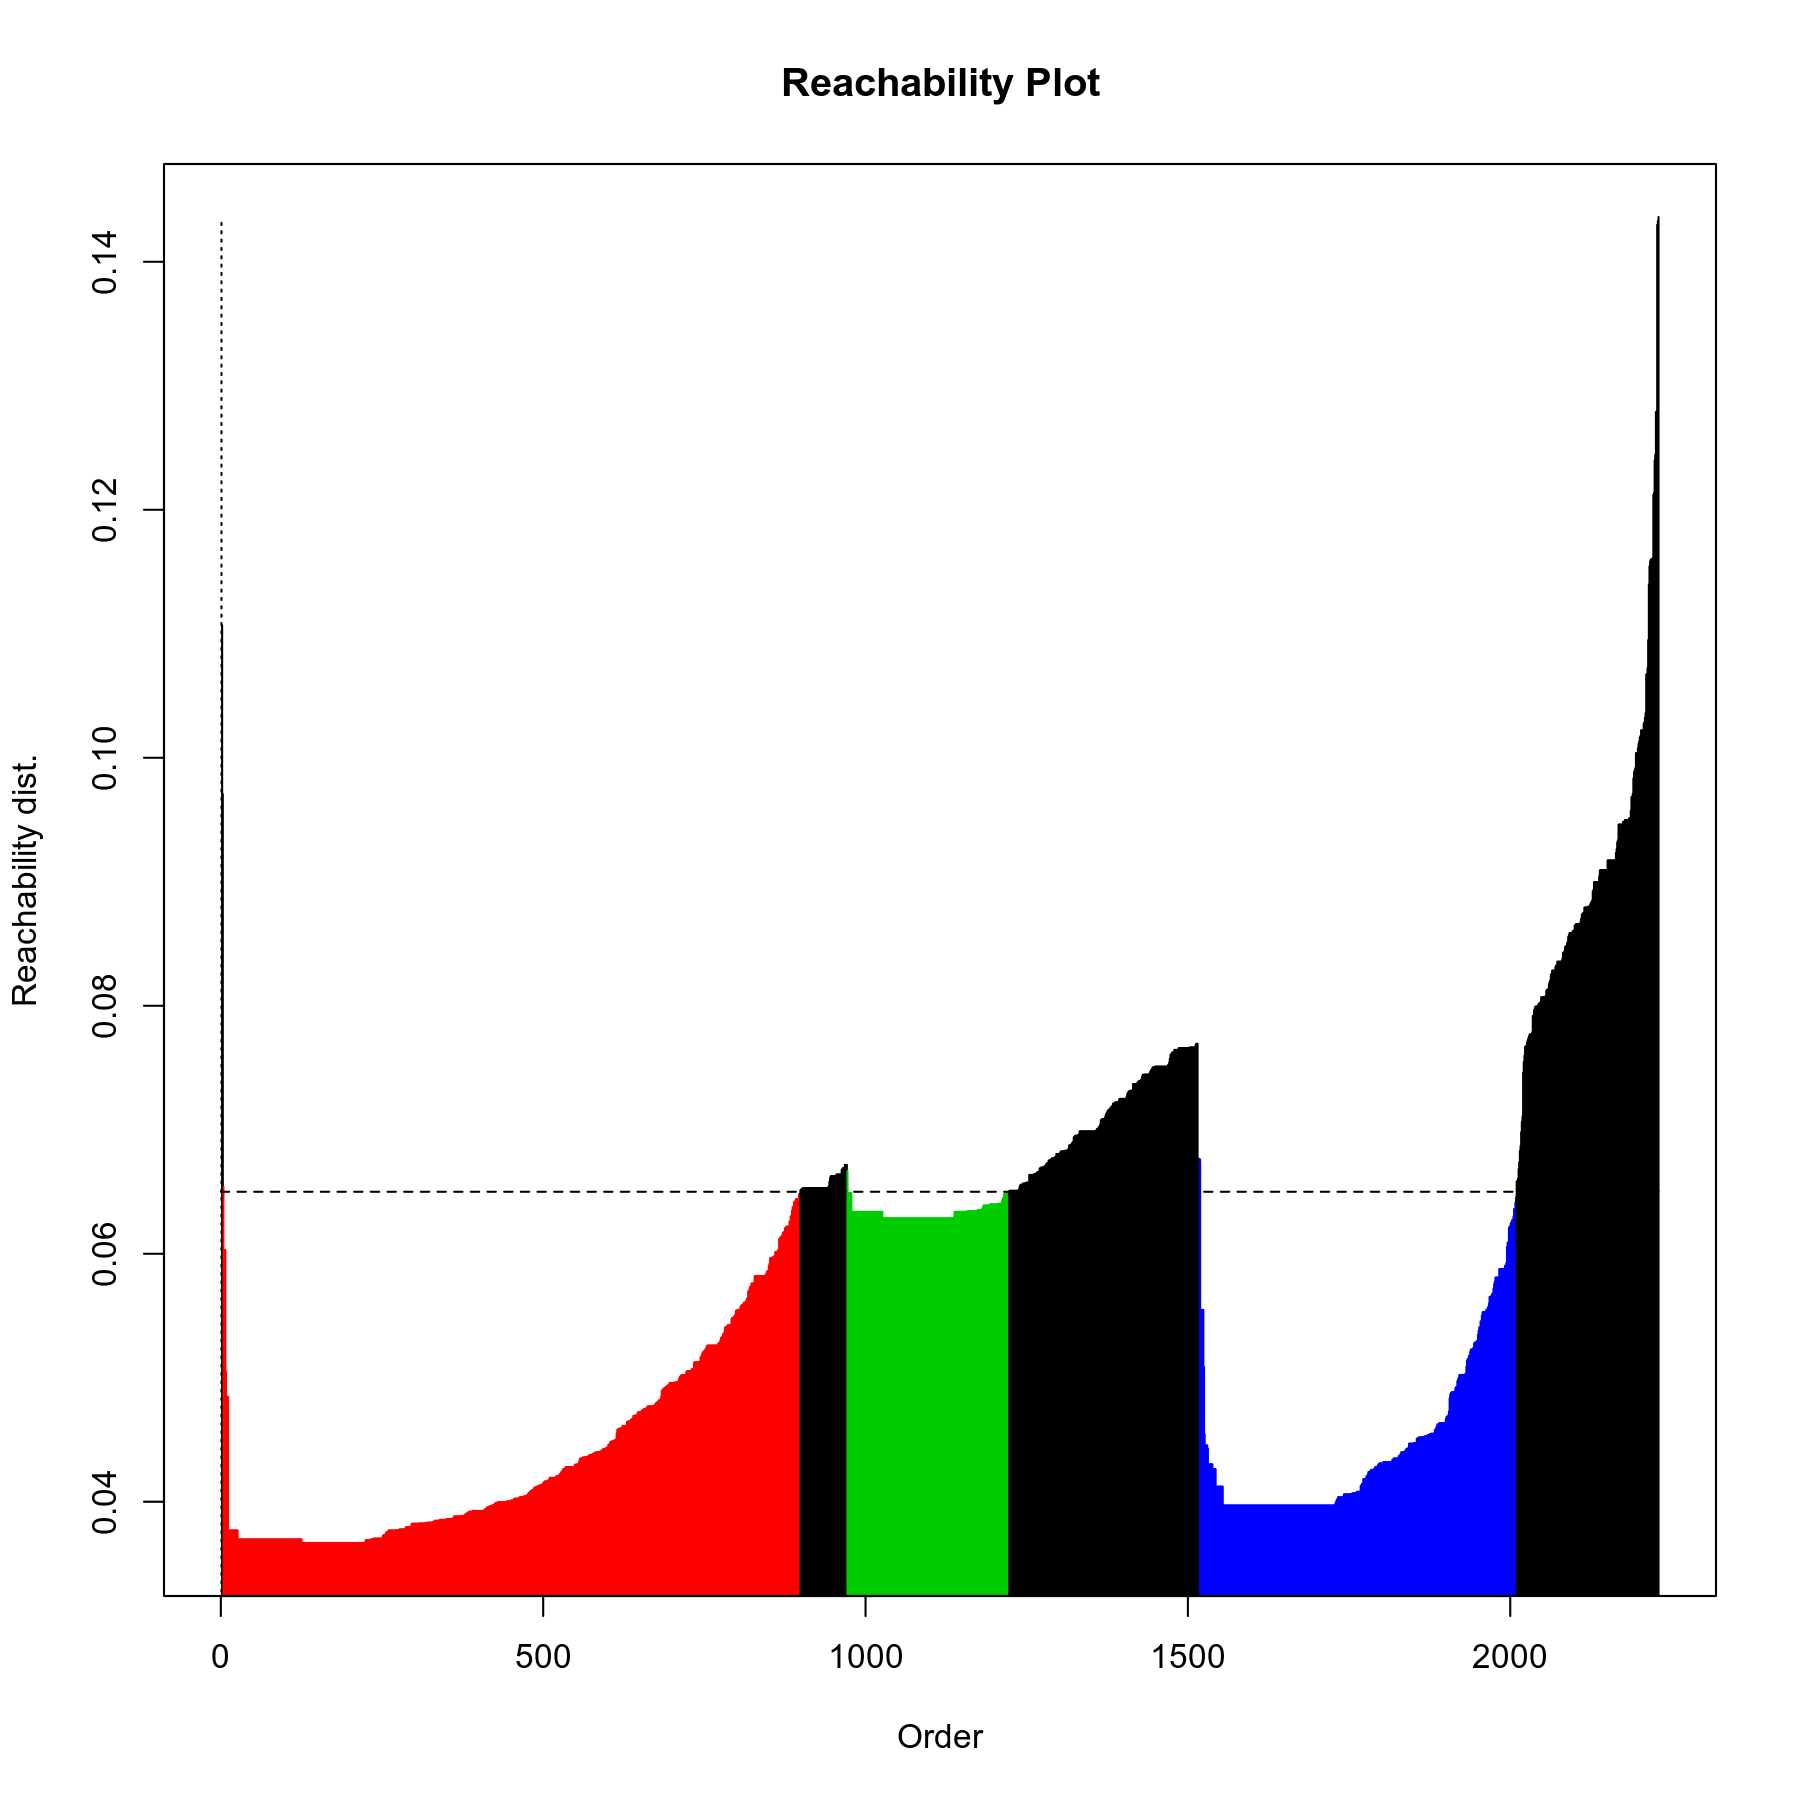

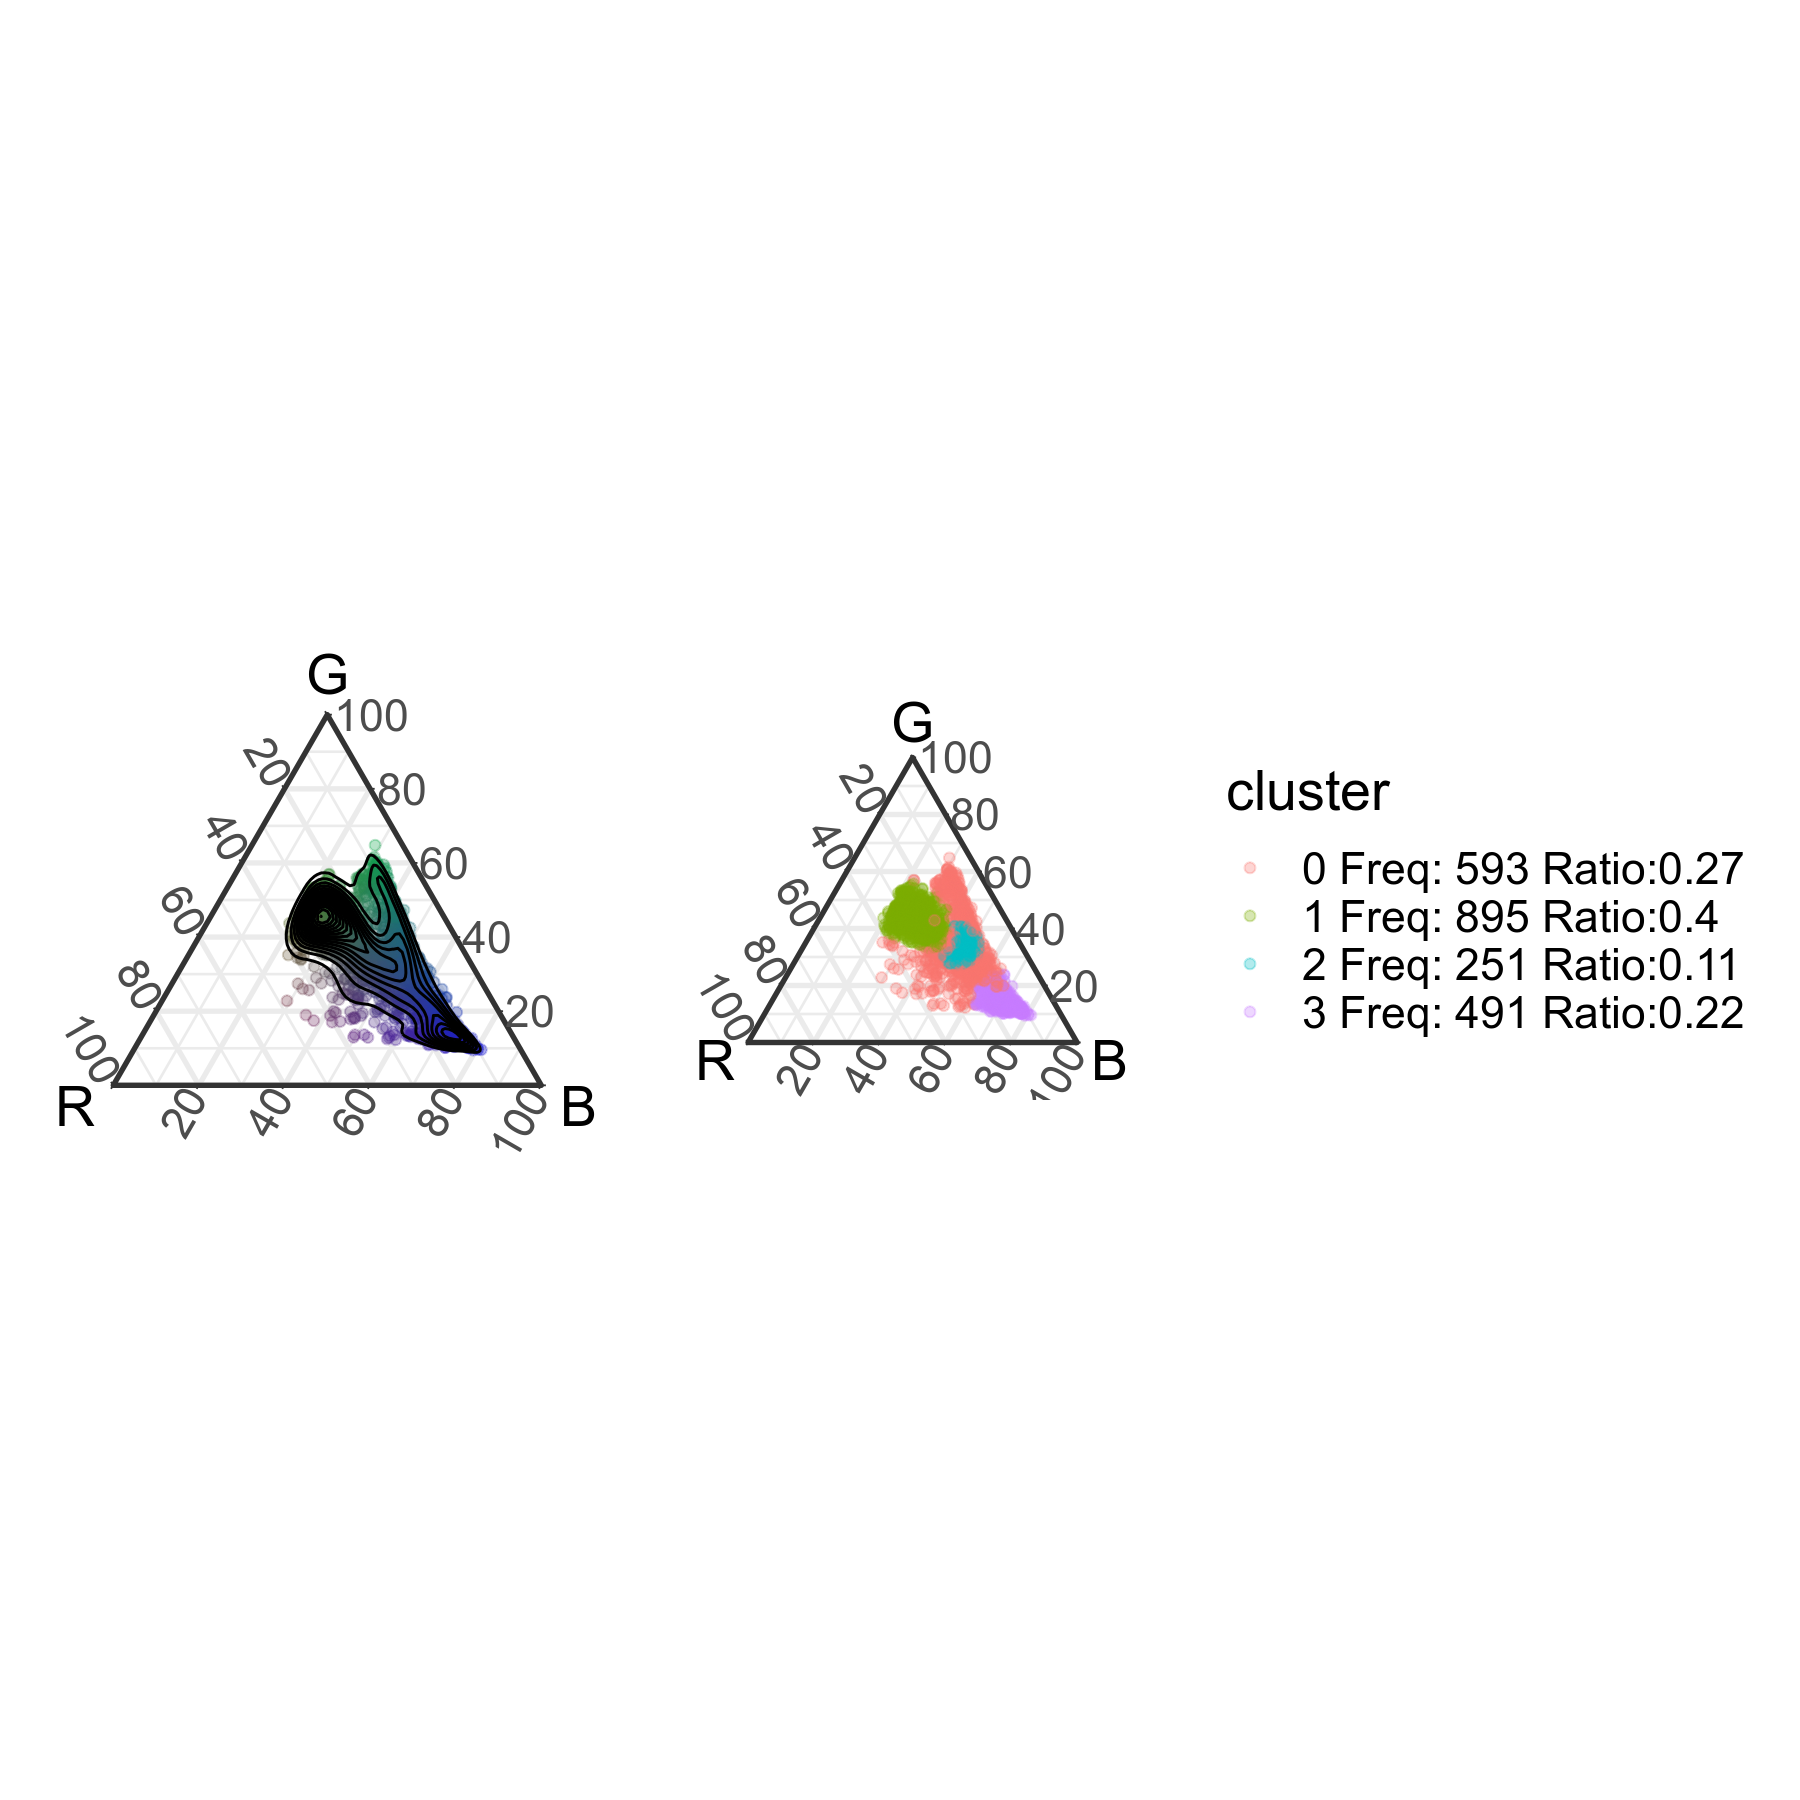

In [7]:
%%R -i D -w 9 -h 9 --units in -r 200 

library(patchwork)
library(ggtern)
D = as.data.frame(D)
# db <- dbscan(D, eps = .5, minPts = 10,  borderPoints = F)
# print(db)
# hdb <- hdbscan(D, minPts = 100)
# print(hdb)

# Clust <- densityClust(D, gaussian=TRUE)
# p4 = qplot(Clust$rho, Clust$delta, xlab='rho', ylab='delta', main='Density cluster attributes')
# print(p4) ##  gridExtra::tableGrob(counts),

# Clust <- findClusters(Clust, rho=0.925, delta=0.2)
# counts = as.data.frame(table(Clust$clusters))
# counts$Ratio = round(counts$Freq/sum(counts$Freq), 2)
# D$col = apply(D, 1, function(x) {rgb(x[1], x[2], x[3])})
# print(head(D))
# print(dim(D))
# D$cluster = factor(Clust$clusters)
# levels(D$cluster) = paste0(levels(D$cluster), " Freq: ", counts[,2], " Ratio:", counts[,3])
# colnames(D) = c("R", "G", "B", "col", 'cluster')
# col = D$col
# names(col) = D$ID
# colnames(D) = c("R", "G", "B", "col", 'cluster')
# print(head(D))
# p1 = ggtern(D,aes(R,G,B)) +
#  geom_point(color = col, alpha=.3) + 
#  geom_density_tern(bins=15, color='black', lwd=.4) + theme_bw(base_size = 20, base_family = "")

# p2 = ggtern(D,aes(R,G,B, color=cluster)) + theme_bw(base_size = 20, base_family = "") + 
#    geom_point(alpha=.3)

res = dbscan::optics(D, eps=10, minPts=200)
plot(res)

res <- dbscan::extractDBSCAN(res, eps_cl = 0.065)
print(res)
print(str(res))
plot(res)

# Clust <- densityClust(D, gaussian=TRUE)
# p4 = qplot(Clust$rho, Clust$delta, xlab='rho', ylab='delta', main='Density cluster attributes')
# Clust <- findClusters(Clust, rho=0.9, delta=0.2)

cluster = res$cluster
counts = as.data.frame(table(cluster))
counts$Ratio = round(counts$Freq/sum(counts$Freq), 2)
print(counts)

D$col = apply(D, 1, function(x) {rgb(x[1], x[2], x[3])})
print(head(D))
print(dim(D))
# D$cluster = factor(Clust$clusters)
D$cluster = factor(res$cluster)
levels(D$cluster) = paste0(levels(D$cluster), " Freq: ", counts[,2], " Ratio:", counts[,3])
colnames(D) = c("R", "G", "B", "col", 'cluster')
col = D$col
names(col) = D$ID
colnames(D) = c("R", "G", "B", "col", 'cluster')
print(head(D))
p1 = ggtern(D,aes(R,G,B)) +
 geom_point(color = col, alpha=.3) + 
 geom_density_tern(bins=16, color='black', lwd=.5) + theme_bw(base_size = 20, base_family = "")

p2 = ggtern(D,aes(R,G,B, color=cluster)) + theme_bw(base_size = 20, base_family = "") + 
   geom_point(alpha=.3)

out = ggtern::grid.arrange(p1, p2, ncol=2, widths=c(1, 1.75))
ggsave('Tumor5_3clones_cluster.pdf', out, width=18, height=6)

# D = as.data.frame(D)
# D$col = apply(D, 1, function(x) {rgb(x[1], x[2], x[3])})
# print(head(D))
# print(dim(D))
# colnames(D) = c("R", "G", "B", "col")
# ggtern(data=D,aes(x=R,y=G,z=B),aes(x,y,z)) + 
#   stat_density_tern(geom="polygon",color='black',
#                     n=400,h=0.75,expand = 1.1, bins=100,
#                     base='identity',
#                     aes(fill = ..level..), #weight = d
#                     na.rm = TRUE) +  # geom_point(color="black",size=5,shape=21) + #geom_text(aes(label=id),size=3) + 
#   scale_fill_gradient(low="yellow",high="red") + 
#   scale_color_gradient(low="yellow",high="red") + 
#   theme_rgbw() + 
#   theme(legend.justification=c(0,1), legend.position=c(0,1)) +
#   theme_gridsontop() + 
#   guides(fill = guide_colorbar(order=1),color="none") + 
#   labs(title= "Ternary Plot and Filled Contour",fill = "Value, V")

In [8]:
!pwd

/data/langenau/alvin_singlecell/02_microscopy/Tiffany
